# Rodriguez, Ismael R
### MIS 670
### Final Project
### 12 MAY 2020

K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



The URL link to my video presentation: https://www.youtube.com/watch?v=FtAXlLmSaZA&feature=youtu.be

# I.  Business and Data Understanding

This study uses Twitter-based social media to examine the topics of Data Anayltics and Business Strategy.  

Why?

This could be valuable for K-State College of Business Administration teaching and research:

Businesses undervalue data strategy:

- According to DalleMule and Davenport in "What is Your Data Strategy":

    - Business have glaring problems with their data strategy
    - Data strategy should have two prongs
    
        Defensive:  Think IT, Cyber Security, Data Warehousing, Risk Management
        Offensive:  THink Analytics, Insights, Business Applications
        
    - Different organizations have different strategic needs along the offense-defense spectrum
    
(DalleMule and Davenport, Harvard Business Review, May-Jun 2017, https://hbr.org/2017/05/whats-your-data-strategy)


- According to Ladley and Redmon in "Use Data to Accelerate Your Business Strategy":

    - Data adds to six broad strategic business aims:
        
        Process improvement
        Competitiveness
        Product improvement
        Data integration into products
        Talent improvements
        Risk management improvements
        
(Ladley and Redmon, Harvard Business Review, 03 March 2020, https://hbr.org/2020/03/use-data-to-accelerate-your-business-strategy?referral=03759&cm_vc=rr_item_page.bottom)


K-State courses in Data Analytics cover both offensive and defensive topics.

- Inside College of Business Adminstration: analytics, visualization, and machine learning
- Outside College of Business Administration:  data science, statistics, spatial analysis
- This study could point toward coursework that addresses specific data strategy topics
- This study could reveal topics around which to develop a specific course in data analytics strategy

Let's find out!



# II. Data identification and collection 

Twitter data extraction requires access and tools:

Access:

- Twitter provided consumer keys and and access tokens

Tools:

- MIS 670 course instructor provided the script

    - 1_twitter_streaming.py
    - relies on tweepy package
    - streams JSON formatted data to file
    - set to filter english language tweets
    
- User provided the search key words, geared toward a DalleMule and Davenport offensive strategy:
    
    - iterative set of searches to hone overall content of dataset
    - Depending on keywords used, search results varied from less than 100 to more than 3000
    - final search settle on:
        
        - "data analytics"
        - "business strategy"
        - Terms limited number of tweets but effectively filtered foreign language results
    


# III. Data cleaning & Text preprocessing

Twitter Data required a tranformation from JSON to Pandas Dataframe

- All cleaning and text-preprocessing consolidated in this section

    - cleaning focus:
    
        - Create baseline Dataframe
        - Extract tweet attributes from JSON
        - Save baseline Dataframe to csv file
        
    - text-preprocessing focus:
    
        - Prepare tweet text content for frequency and sentiment analysis
        - Prepare tweet text content for topic modeling analysis
        - Prepare tweet text content for mention network analysis
        - Prepare tweet text content for cohashtag network analysis
        - Prepare tweet text content for rudimentary url network analysis
        


## A.  Load Software Packages

In [1]:
# Software Preparation and Packages

# import essential packages
import csv
import pandas as pd 
import re 
import requests
from bs4 import BeautifulSoup

import json 

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



# gensim for topic modeling
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import itertools
from collections import Counter
from operator import itemgetter

from pprint import pprint

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import JSON file data twitterdata_05122020_1106-1109

baseData = []

for line in open('data/twitterdata_05122020_1130_1140.json'):
    try:
        baseData.append(json.loads(line))
    except:
        pass


In [6]:
print(len(baseData))

87


In [7]:
baseTweets = []
for T in baseData:
    if 'text' in T:
        baseTweets.append(T)
len(baseTweets)

87

In [8]:
# Simplified transformation to Dataframe adapted from https://stackoverflow.com/questions/46044445/not-able-to-scrape-geo-coordinate-with-tweets-lat-lon

#def toDataframe(baseTweets):
baseDF = pd.DataFrame()

baseDF['tweetUserName']=[b['user']['name'] for b in baseTweets]
baseDF['tweetScreenName']=[b['user']['screen_name'] for b in baseTweets]
baseDF['tweetText']= [b['text'] for b in baseTweets]
baseDF['tweetID']= [b['id_str'] for b in baseTweets]
baseDF['tweetUserURL']=[b['user']['url'] for b in baseTweets]
baseDF['tweetUserFollowerCount']=[b['user']['followers_count'] for b in baseTweets]
baseDF['tweetUserFriendCount']=[b['user']['friends_count'] for b in baseTweets]
baseDF['tweetTime']=[b['created_at'] for b in baseTweets]
baseDF['tweetUrls']=[b['entities']['urls'] for b in baseTweets]



In [102]:
#Set column width for dataframes

pd.set_option('display.max_colwidth', -1)

In [103]:
# Inspect dataframe
baseDF.head(1)

,Unnamed: 0,tweetUserName,tweetScreenName,tweetText,tweetID,tweetUserURL,tweetUserFollowerCount,tweetUserFriendCount,tweetTime,tweetUrls
0,0,KDR Recruitment USA,KDRrecUSA,"Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt",1260245853869989888,https://www.kdrrecruitment.com/usa-recruiting.aspx,5403,5213,Tue May 12 16:30:00 +0000 2020,"[{'url': 'https://t.co/W5GnrUB0vt', 'expanded_url': 'https://twitter.com/i/web/status/1260245853869989888', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]"


In [104]:
#Save dataframe to csv file

baseDF.to_csv('data/baseTweetData.csv')

## B.  Text pre-processing

In [12]:
# Tokenization process for Descriptive Analytics

baseDF = pd.read_csv("data/baseTweetData.csv")

In [14]:
#Dataframe tweet text cleaning and tokenization

#cleanDF = baseDF
cleanDF = baseDF[['tweetText','tweetTime','tweetScreenName','tweetUserName', 'tweetUserURL']]

In [15]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
#moreStopwords = set(('mt','rt'))
#extraStoplist = set(stopwords.words('english'))| moreStopwords

cleanDF['cleanTweet']=cleanDF['tweetText']
cleanDF['cleanTweet']=cleanDF.cleanTweet.str.lower()
cleanDF['cleanTweet']=cleanDF.cleanTweet.str.replace('http\S+|www.\S+', '') # remove websites
cleanDF['cleanTweet']=cleanDF.cleanTweet.str.replace('\d+','')
cleanDF['cleanTweet']=cleanDF.cleanTweet.str.split().map(lambda x: " ".join(y for y in x if len(y)>3))
cleanDF['cleanTweet']=cleanDF.cleanTweet.str.replace('[^a-zA-Z]+',' ')
cleanDF['cleanTweet']=cleanDF.cleanTweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
cleanDF['words']= cleanDF.cleanTweet.str.split()
cleanDF['wordCount']=cleanDF['tweetText'].str.split().str.len()
cleanDF['tweetLength']=cleanDF.tweetText.str.len()





In [16]:
cleanDF.head(1)

,tweetText,tweetTime,tweetScreenName,tweetUserName,tweetUserURL,cleanTweet,words,wordCount,tweetLength
0,"Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt",Tue May 12 16:30:00 +0000 2020,KDRrecUSA,KDR Recruitment USA,https://www.kdrrecruitment.com/usa-recruiting.aspx,good data analytics candidates strong technical skills high demand,"[good, data, analytics, candidates, strong, technical, skills, high, demand]",21,140


In [17]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 9 columns):
tweetText          87 non-null object
tweetTime          87 non-null object
tweetScreenName    87 non-null object
tweetUserName      87 non-null object
tweetUserURL       55 non-null object
cleanTweet         87 non-null object
words              87 non-null object
wordCount          87 non-null int64
tweetLength        87 non-null int64
dtypes: int64(2), object(7)
memory usage: 6.2+ KB


In [18]:
# Remove tweets with null values

cleanDFurl = cleanDF.dropna()

In [19]:
cleanDFurl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 86
Data columns (total 9 columns):
tweetText          55 non-null object
tweetTime          55 non-null object
tweetScreenName    55 non-null object
tweetUserName      55 non-null object
tweetUserURL       55 non-null object
cleanTweet         55 non-null object
words              55 non-null object
wordCount          55 non-null int64
tweetLength        55 non-null int64
dtypes: int64(2), object(7)
memory usage: 4.3+ KB


In [20]:
cleanDF = cleanDFurl

In [21]:
# Bag of Words Preparation for Topic Modeling

bowTweets = []
r = cleanDF['cleanTweet'].values
for i in r:
    bowTweets.append(i)
len(bowTweets)

55

In [22]:
bowTweets[:1]

['good data analytics candidates strong technical skills high demand']

In [23]:
# Remove useless words
bowDocs = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in bowTweets]
#Tokenize
bowTexts = [[word for word in text.lower().split() ] for text in bowDocs]

In [24]:
from nltk.corpus import stopwords

# lemmatize bag of word Tweets
lmtzr = WordNetLemmatizer()
bowTexts = [[lmtzr.lemmatize(word) for word in text ] for text in bowTexts]

stoplist = stopwords.words('english')
bowTexts = [[word for word in text if word not in stoplist] for text in bowTexts]




In [25]:
# Create a Dictionary
dictionary = Dictionary(bowTexts)

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in bowTexts]



## C. Network Analysis text pre-processing

In [26]:
# Build mentions list for mention network analysis

cleanDF['mentions']=cleanDF.tweetText.str.findall("(?<=@)\w+")
#cleanDF['mentions']-cleanDF.mentions.str.split()


In [27]:
cleanDF.head(1)

,tweetText,tweetTime,tweetScreenName,tweetUserName,tweetUserURL,cleanTweet,words,wordCount,tweetLength,mentions
0,"Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt",Tue May 12 16:30:00 +0000 2020,KDRrecUSA,KDR Recruitment USA,https://www.kdrrecruitment.com/usa-recruiting.aspx,good data analytics candidates strong technical skills high demand,"[good, data, analytics, candidates, strong, technical, skills, high, demand]",21,140,[]


In [28]:
tweets = cleanDF.values

In [29]:
tweets[:1]

array([['Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt',
        'Tue May 12 16:30:00 +0000 2020', 'KDRrecUSA',
        'KDR Recruitment USA',
        'https://www.kdrrecruitment.com/usa-recruiting.aspx',
        'good data analytics candidates strong technical skills high demand',
        list(['good', 'data', 'analytics', 'candidates', 'strong', 'technical', 'skills', 'high', 'demand']),
        21, 140, list([])]], dtype=object)

In [165]:
mention = []
for tweet in tweets:
    mention.append([tweet[2], tweet[0]])

In [166]:
mention[:3]

[['SuriyaSubraman',
  'Big Data Analytics in Healthcare Market Worth USD 67.82 Billion by the end 2025: In addition, big data analytics op… https://t.co/l1HNDrn6Sk'],
 ['chardesmbeauty',
  'RT @888beautyllc: Quarantine.... But make it fashion! \n\nWhat have you learned about your business today? Have you figured out how to #pivot…'],
 ['teamdappquery',
  'Fill this google form if you would like us to build your #analytics #dashboard for your #SmartContracts data. You c… https://t.co/kNkqcH9A5z']]

In [167]:

openfile = open("data/mentionnetwork.csv", "w", newline='')

w=csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0],i])
        print([tweet[0], i])
openfile.close()


['chardesmbeauty', '888beautyllc']
['Kristie_L_Mann', 'Gartner_inc']
['Kristie_L_Mann', 'Brazingo']
['TeckVado', 'Kristie_L_Mann']
['TeckVado', 'Gartner_inc']
['TeckVado', 'Brazingo']
['TeckVado', 'IntelB']


In [168]:
# Prepare data for rudimentary url link network analyis

urls =[]
for tweet in tweets:
    urls.append([tweet[2],tweet[4]])
    
openfile = open("data/linknetwork.csv", "w", newline='')

w=csv.writer(openfile)

for tweet in urls:
    w.writerow([tweet[0], tweet[1]])
   

openfile.close()

In [169]:
urls[:10]

[['SuriyaSubraman', 'https://www.linkedin.com/in/suriyansubramanian/'],
 ['chardesmbeauty', 'http://www.888beautyllc.com'],
 ['teamdappquery', 'https://dappquery.com/'],
 ['Kristie_L_Mann',
  'https://www.intel.com/content/www/us/en/architecture-and-technology/optane-dc-persistent-memory.html'],
 ['TeckVado', 'https://www.linkedin.com/in/ampzmx/']]

In [36]:
# Prepare data for co-hashtag analysis

hashtagNetwork = []

for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtagNetwork.append(hashtag)

In [37]:
hashtagNetwork[:10]

[[],
 ['bigdata', 'iot', 'analytics', 'ai'],
 [],
 ['supplychain', 'bigdata'],
 [],
 [],
 ['healthcare'],
 ['datastorytelling'],
 ['videomarketing', 'business'],
 []]

In [38]:
from itertools import combinations

cohashtags = [x for d in hashtagNetwork for x in combinations(d,2)]
cohashtags[:10]

[('bigdata', 'iot'),
 ('bigdata', 'analytics'),
 ('bigdata', 'ai'),
 ('iot', 'analytics'),
 ('iot', 'ai'),
 ('analytics', 'ai'),
 ('supplychain', 'bigdata'),
 ('videomarketing', 'business'),
 ('oracleanalytics', 'oasummit'),
 ('oracleanalytics', 'augmentedanalytics')]

In [39]:
outfile = open("data/cohashtagNetwork.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)
outfile.close()

# IV. Descriptive analytics

## A. Basic Statistics:

- Initial Tweets: 87
- Tweets without null values: 55

    - Most null values were missing user url link

- Basic Word Statistics:

    - Average Word Count:  18 words
    - Minimum Word Count: 6 word
    - Maximum Word Count: 28 words
    
    - Average tweet length: 130 characters
    - Minimum tweet length: 77 character
    - Maximum tweet length: 144
  

- Top 5 Words

    - data 32
    - analytics 27
    - business 18
    - strategy 8
    - amp  5
    
- Top 5 users
    - Suriya Subramanian      3
    - Nathan Baschez          1
    - Dappquery               1
    - Vikas gautam            1
    - David Menninger         1


-  Top User Websites:

    - https://www.linkedin.com/in/suriyansubramanian/       3
    - https://www.inrev.org/                                1
    - http://IslamIsPerfectButMuslimsAreNot.world           1- 
    - http://www.unionwear.com                              1
    - https://www.linkedin.com/in/ampzmx/                   1
    - https://www.coupa.com                                 1
    - http://thewebnista.com                                1
    - https://www.kdrrecruitment.com/usa-recruiting.aspx    1
    - https://www.prolifics.co.uk/                          1
    - http://davidmenninger.ventanaresearch.com             1

In [148]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 86
Data columns (total 13 columns):
tweetText             55 non-null object
tweetTime             55 non-null object
tweetScreenName       55 non-null object
tweetUserName         55 non-null object
tweetUserURL          55 non-null object
cleanTweet            55 non-null object
words                 55 non-null object
wordCount             55 non-null int64
tweetLength           55 non-null int64
mentions              55 non-null object
vaderCompoundScore    55 non-null float64
vaderPositve          55 non-null float64
vaderNegative         55 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 6.0+ KB


In [41]:
cleanDF['wordCount'].describe()

count    55.000000
mean     17.890909
std      3.970599 
min      6.000000 
25%      15.000000
50%      19.000000
75%      21.000000
max      28.000000
Name: wordCount, dtype: float64

In [42]:
cleanDF['tweetLength'].describe()

count    55.000000 
mean     130.145455
std      18.299381 
min      77.000000 
25%      132.000000
50%      140.000000
75%      140.000000
max      144.000000
Name: tweetLength, dtype: float64

In [43]:
cleanDF['tweetUserName'].value_counts().head(10)

Suriya Subramanian      3
Nathan Baschez          1
Dappquery               1
Vikas gautam            1
David Menninger         1
Prolifics               1
Laura Romero            1
Elisabeth Bitsch-Chr    1
FreightCenter           1
Alteryx                 1
Name: tweetUserName, dtype: int64

In [136]:
cleanDF['tweetUserURL'].value_counts().head(10)

https://www.linkedin.com/in/suriyansubramanian/       3
https://www.inrev.org/                                1
http://IslamIsPerfectButMuslimsAreNot.world           1
http://www.unionwear.com                              1
https://www.linkedin.com/in/ampzmx/                   1
https://www.coupa.com                                 1
http://thewebnista.com                                1
https://www.kdrrecruitment.com/usa-recruiting.aspx    1
https://www.prolifics.co.uk/                          1
http://davidmenninger.ventanaresearch.com             1
Name: tweetUserURL, dtype: int64

## B. Frequency Analysis:

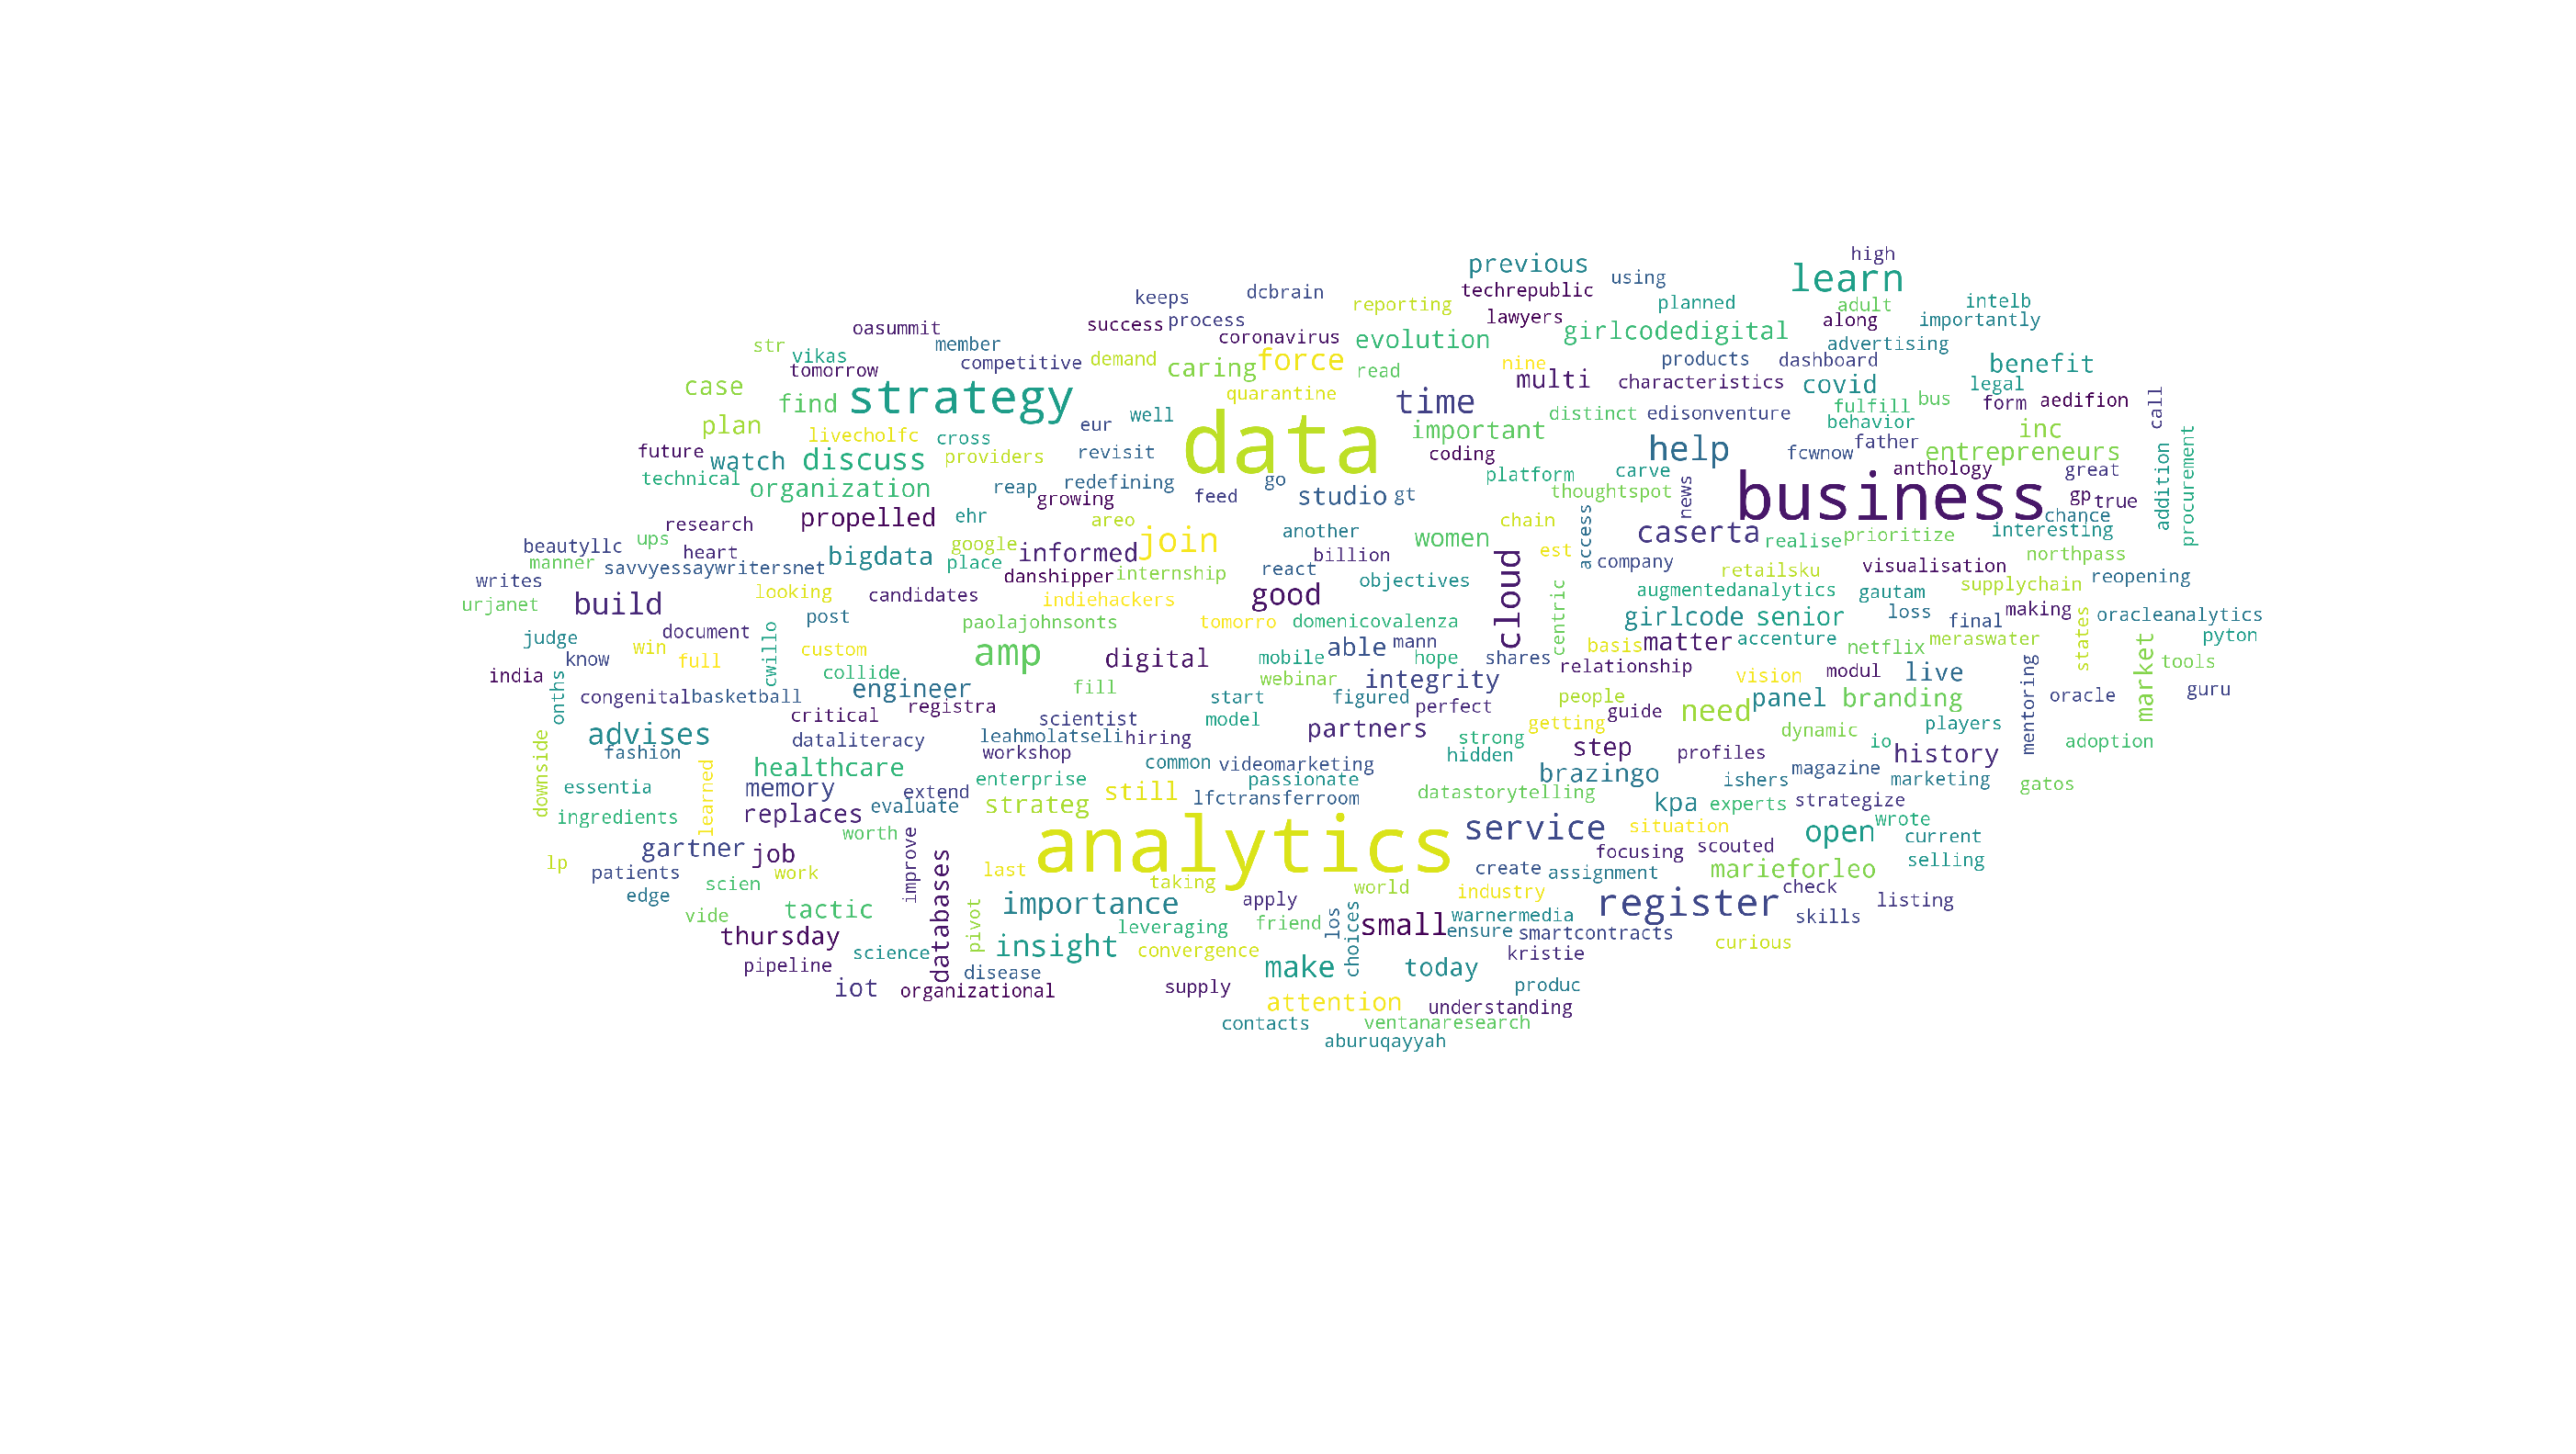

In [141]:
# Word Cloud
# cloud png created by author on 5/11/2020
# savfig adapted from https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html and https://stackoverflow.com/questions/9012487/matplotlib-pyplot-savefig-outputs-blank-image


# Overall Word Cloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random 


# mask 
myMask = np.array(Image.open("data/mycloud.png"))


# image colors
#image_colors = ImageColorGenerator(myMask)

stopwords = set(STOPWORDS)


wcOverall = WordCloud(background_color="white", max_words=300, mask=myMask, stopwords=stopwords, collocations=False).generate(' '.join(cleanDF['cleanTweet']))

#wordcloud = WordCloud().generate(' '.join(cleanDF['cleanTweet']))
plt.figure(figsize=(50,50))
plt.imshow(wcOverall)
plt.axis("off")
plt.savefig("data/wcOverall.png")
plt.show()



In [46]:
# Frequency List

from collections import Counter

fDist = list(Counter(" ".join(cleanDF['cleanTweet']).split(" ")).items())

wordFreq = []

for k,v in fDist:
    wordFreq.append([k,v])

wordFreqDF = pd.DataFrame(wordFreq)

In [47]:

wordFreqDF=wordFreqDF.rename(columns={0: 'word',1: 'occurences'})
#wordFreqDF=wordfreqDF.word.str.findall('\w{3,}').str.join(' ')
wordFreqDF.sort_values('occurences', ascending=False).head(20)

,word,occurences
1,data,32
2,analytics,27
67,business,18
73,strategy,8
122,amp,5
170,register,5
58,learn,5
15,join,4
51,help,4
94,cloud,4


## C.  Sentiment Analysis

Vader Compound Scores

- Total Positive:  33 tweets, mean score 0.52 
- Total Neutral:  21 tweets, mean score -0.25
- Total Negative: 1 tweets, mean scoree 0.00

In [146]:
#Sentiment Analysis

#vader score
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vs = SentimentIntensityAnalyzer()

cleanDF['vaderCompoundScore'] = cleanDF['cleanTweet'].apply(lambda x: vs.polarity_scores(x)['compound'])
cleanDF['vaderPositve'] = cleanDF['cleanTweet'].apply(lambda x: vs.polarity_scores(x)['pos'])
cleanDF['vaderNegative'] = cleanDF['cleanTweet'].apply(lambda x: vs.polarity_scores(x)['neg'])



 

,tweetText,tweetTime,tweetScreenName,tweetUserName,tweetUserURL,cleanTweet,words,wordCount,tweetLength,mentions,vaderCompoundScore,vaderPositve,vaderNegative
0,"Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt",Tue May 12 16:30:00 +0000 2020,KDRrecUSA,KDR Recruitment USA,https://www.kdrrecruitment.com/usa-recruiting.aspx,good data analytics candidates strong technical skills high demand,"[good, data, analytics, candidates, strong, technical, skills, high, demand]",21,140,[],0.6908,0.453,0.109


In [49]:
cleanDF['vaderCompoundScore'].describe()

count    55.000000
mean     0.310084 
std      0.299493 
min     -0.250000 
25%      0.000000 
50%      0.340000 
75%      0.571900 
max      0.807400 
Name: vaderCompoundScore, dtype: float64

In [50]:
posDF = cleanDF[(cleanDF['vaderCompoundScore']>0.1)]

In [51]:
posDF['vaderCompoundScore'].describe()

count    33.000000
mean     0.523600 
std      0.178559 
min      0.177900 
25%      0.401900 
50%      0.542300 
75%      0.670500 
max      0.807400 
Name: vaderCompoundScore, dtype: float64

In [52]:
negDF = cleanDF[(cleanDF['vaderCompoundScore']<-0.1)]

In [53]:
negDF['vaderCompoundScore'].describe()

count    1.00
mean    -0.25
std     NaN  
min     -0.25
25%     -0.25
50%     -0.25
75%     -0.25
max     -0.25
Name: vaderCompoundScore, dtype: float64

In [54]:
neuDF = cleanDF[(cleanDF['vaderCompoundScore']>-0.1) & (cleanDF['vaderCompoundScore']<0.1)]

In [55]:
neuDF['vaderCompoundScore'].describe()

count    21.000000
mean     0.001229 
std      0.009913 
min     -0.025800 
25%      0.000000 
50%      0.000000 
75%      0.000000 
max      0.025800 
Name: vaderCompoundScore, dtype: float64

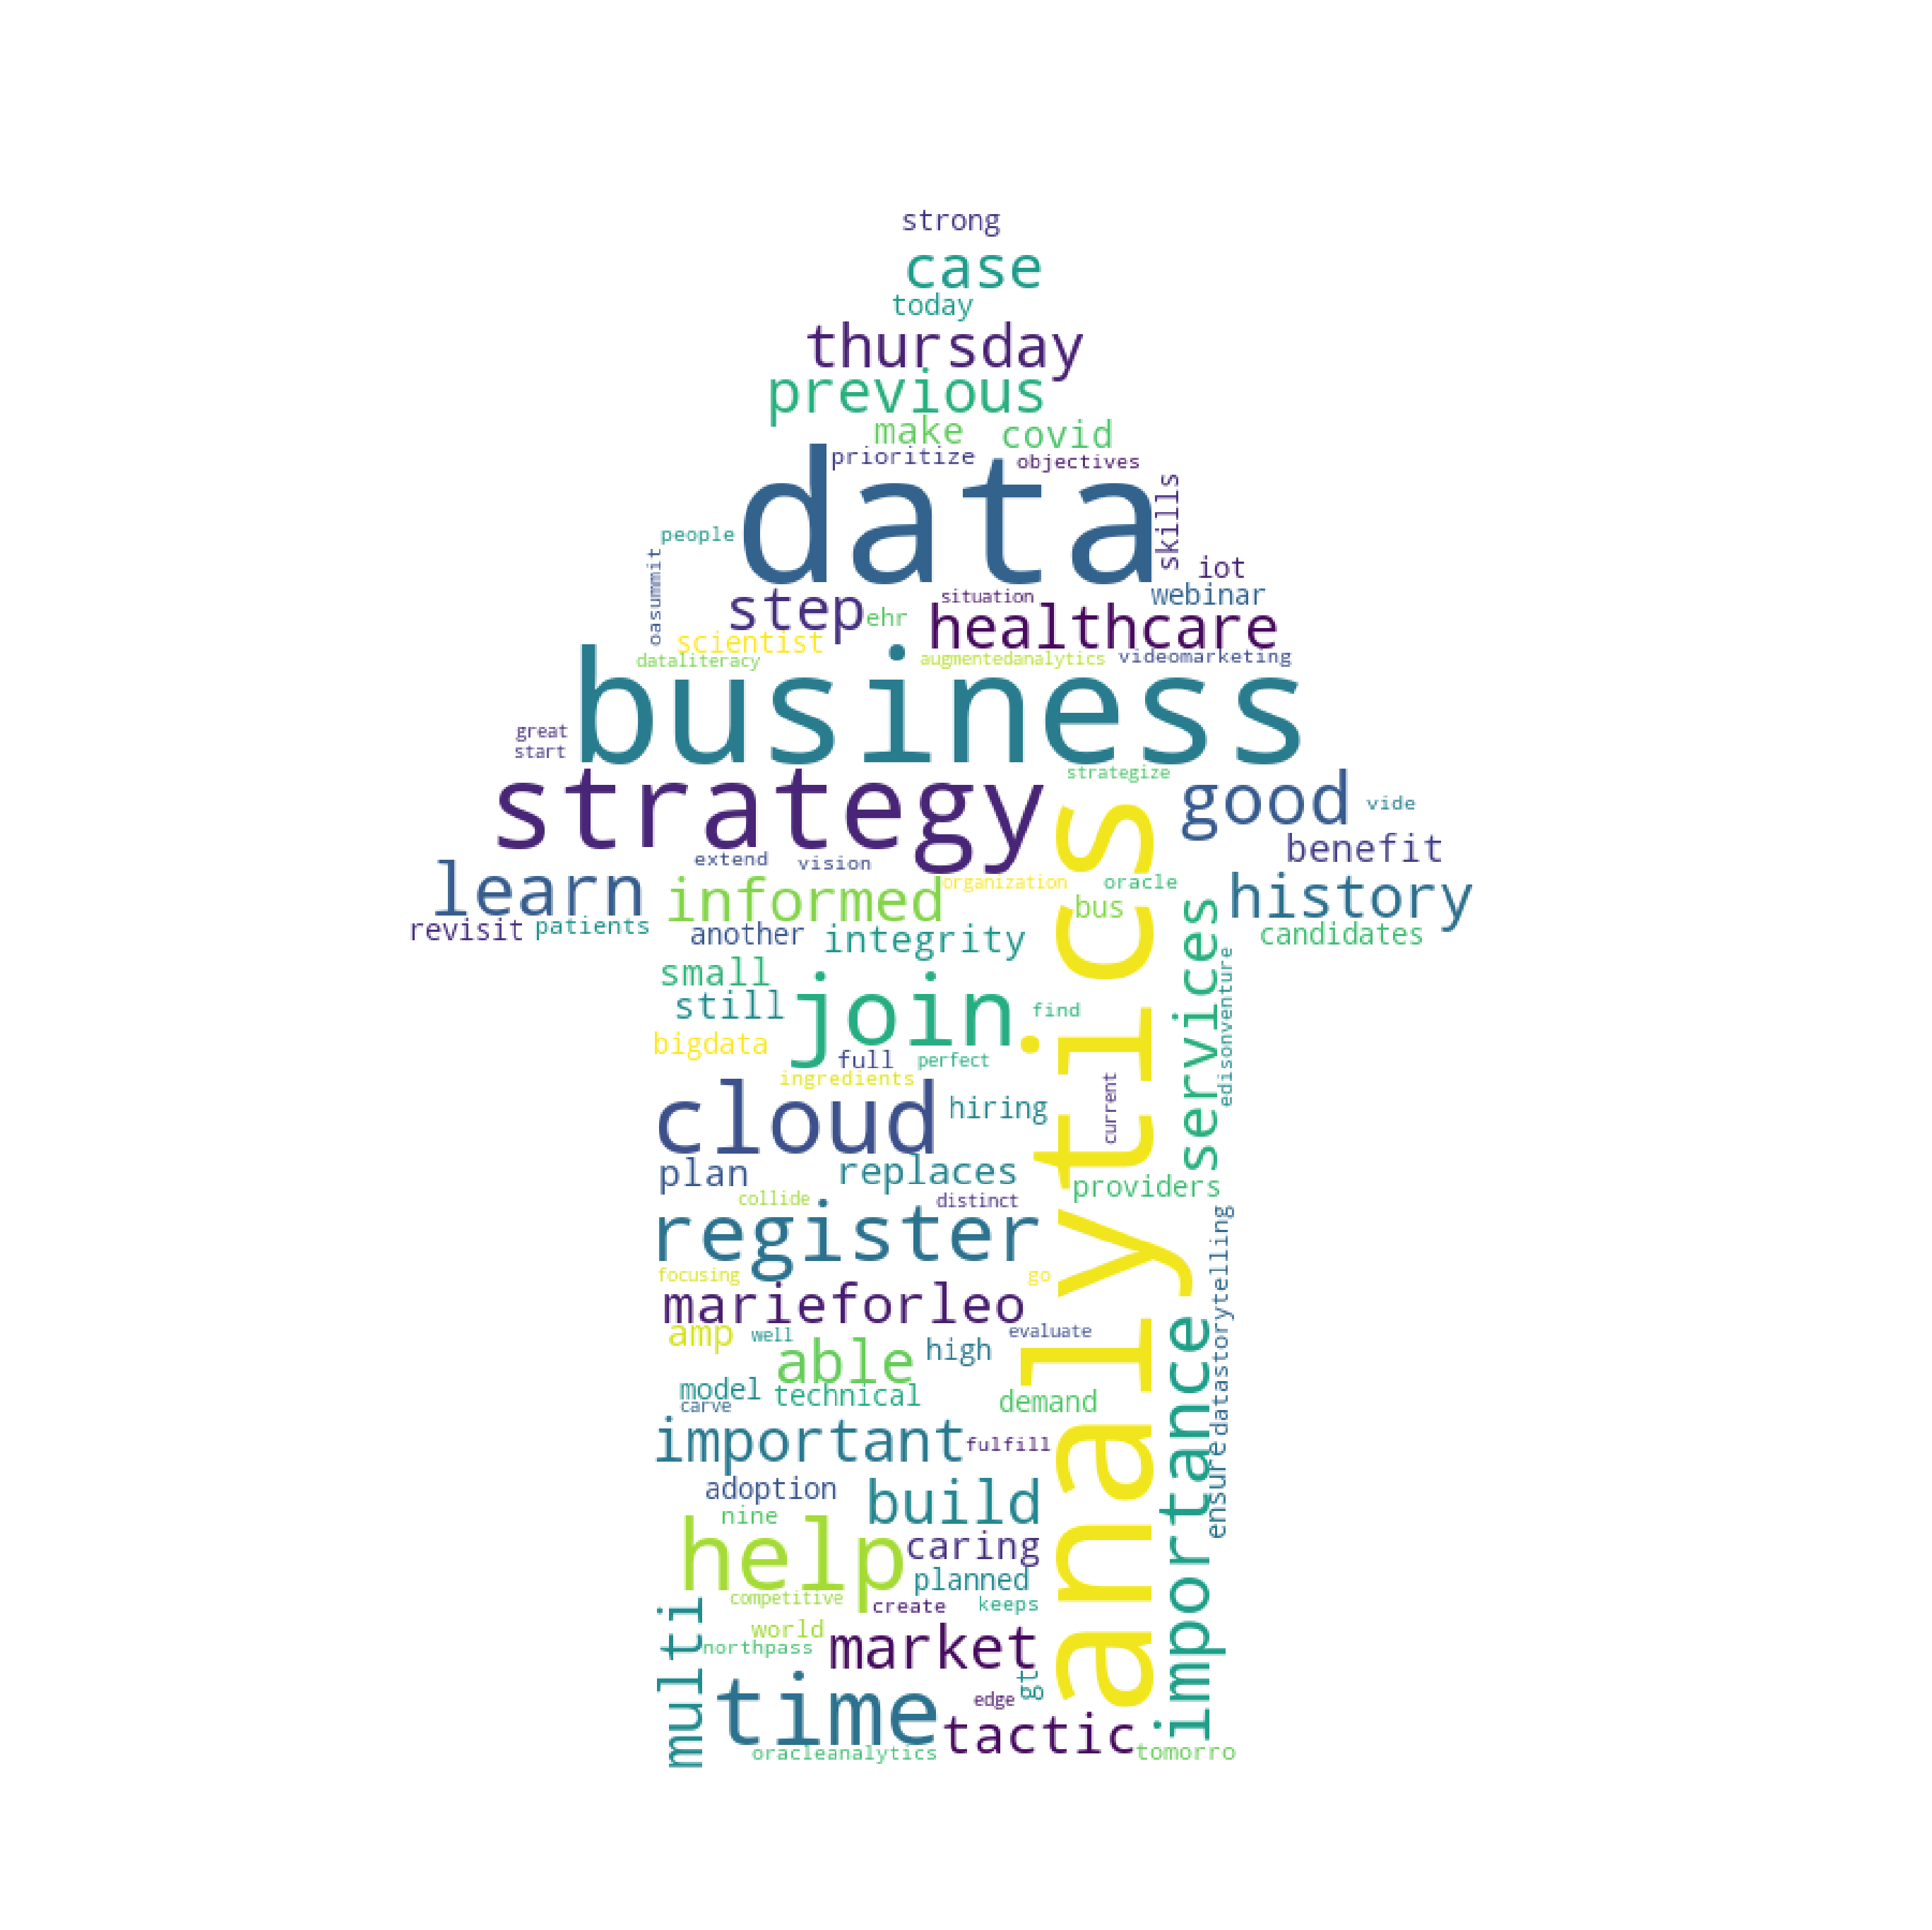

In [145]:
# Positive Word Cloud

# arrow mask drawn by author on 5/11/2020

# Overall Word Cloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# mask 
myMask = np.array(Image.open("data/mypos.png"))

# image colors
#image_colors = ImageColorGenerator(myMask)

stopwords = set(STOPWORDS)
stopwords.add('rt')
stopwords.add('mt')

wcPOS = WordCloud(background_color="white", max_words=100, mask=myMask, stopwords=stopwords).generate(' '.join(posDF['cleanTweet']))

plt.figure(figsize=(50,50))
plt.imshow(wcPOS)
#plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.savefig("data/wcPOS.png")
plt.show()


In [151]:
from collections import Counter

fDist = list(Counter(" ".join(posDF['cleanTweet']).split(" ")).items())

wordFreq = []

for k,v in fDist:
    wordFreq.append([k,v])

wordFreqDF = pd.DataFrame(wordFreq)

wordFreqDF=wordFreqDF.rename(columns={0: 'word',1: 'occurences'})
#wordFreqDF=wordfreqDF.word.str.findall('\w{3,}').str.join(' ')
wordFreqDF.sort_values('occurences', ascending=False).head(20)

,word,occurences
1,data,17
2,analytics,15
43,business,12
49,strategy,6
74,time,4
60,cloud,4
27,help,4
141,register,4
15,join,4
0,good,3


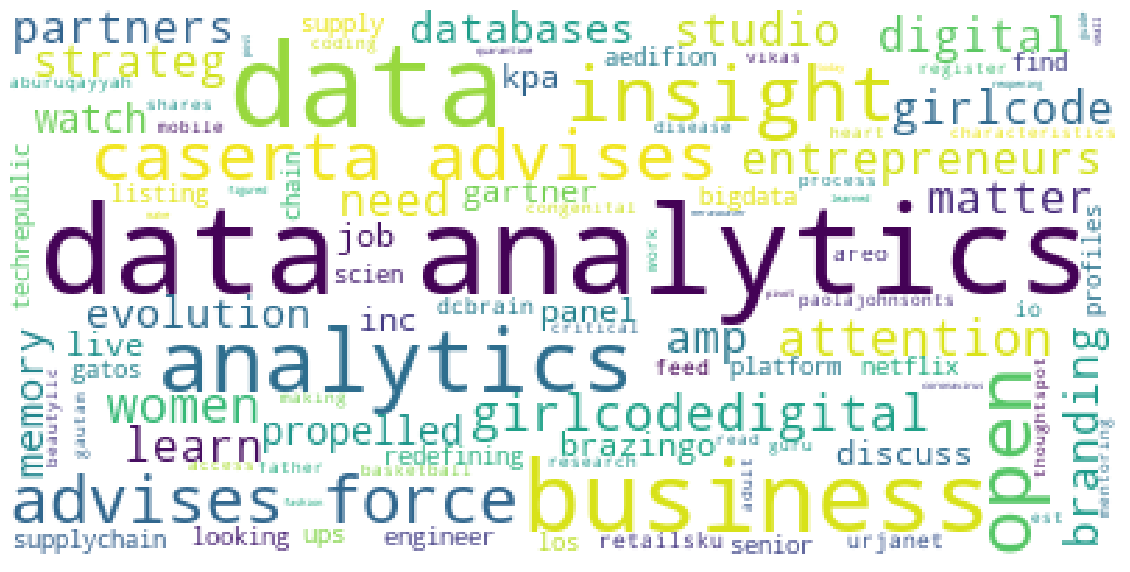

In [144]:
# Neutral Word Cloud

# arrow mask drawn by author on 5/11/2020

# Overall Word Cloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# mask 


# image colors
#image_colors = ImageColorGenerator(myMask)

stopwords = set(STOPWORDS)
stopwords.add('rt')
stopwords.add('mt')

wcNEU = WordCloud(background_color="white", max_words=100, stopwords=stopwords).generate(' '.join(neuDF['cleanTweet']))

plt.figure(figsize=(20,20))
plt.imshow(wcNEU)
#plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.savefig("data/wcNeu.png")
plt.show()

In [152]:
from collections import Counter

fDist = list(Counter(" ".join(neuDF['cleanTweet']).split(" ")).items())

wordFreq = []

for k,v in fDist:
    wordFreq.append([k,v])

wordFreqDF = pd.DataFrame(wordFreq)

wordFreqDF=wordFreqDF.rename(columns={0: 'word',1: 'occurences'})
#wordFreqDF=wordfreqDF.word.str.findall('\w{3,}').str.join(' ')
wordFreqDF.sort_values('occurences', ascending=False).head(20)

,word,occurences
1,data,15
11,analytics,12
35,business,5
107,force,3
106,advises,3
105,caserta,3
34,open,3
98,databases,2
36,partners,2
28,attention,2


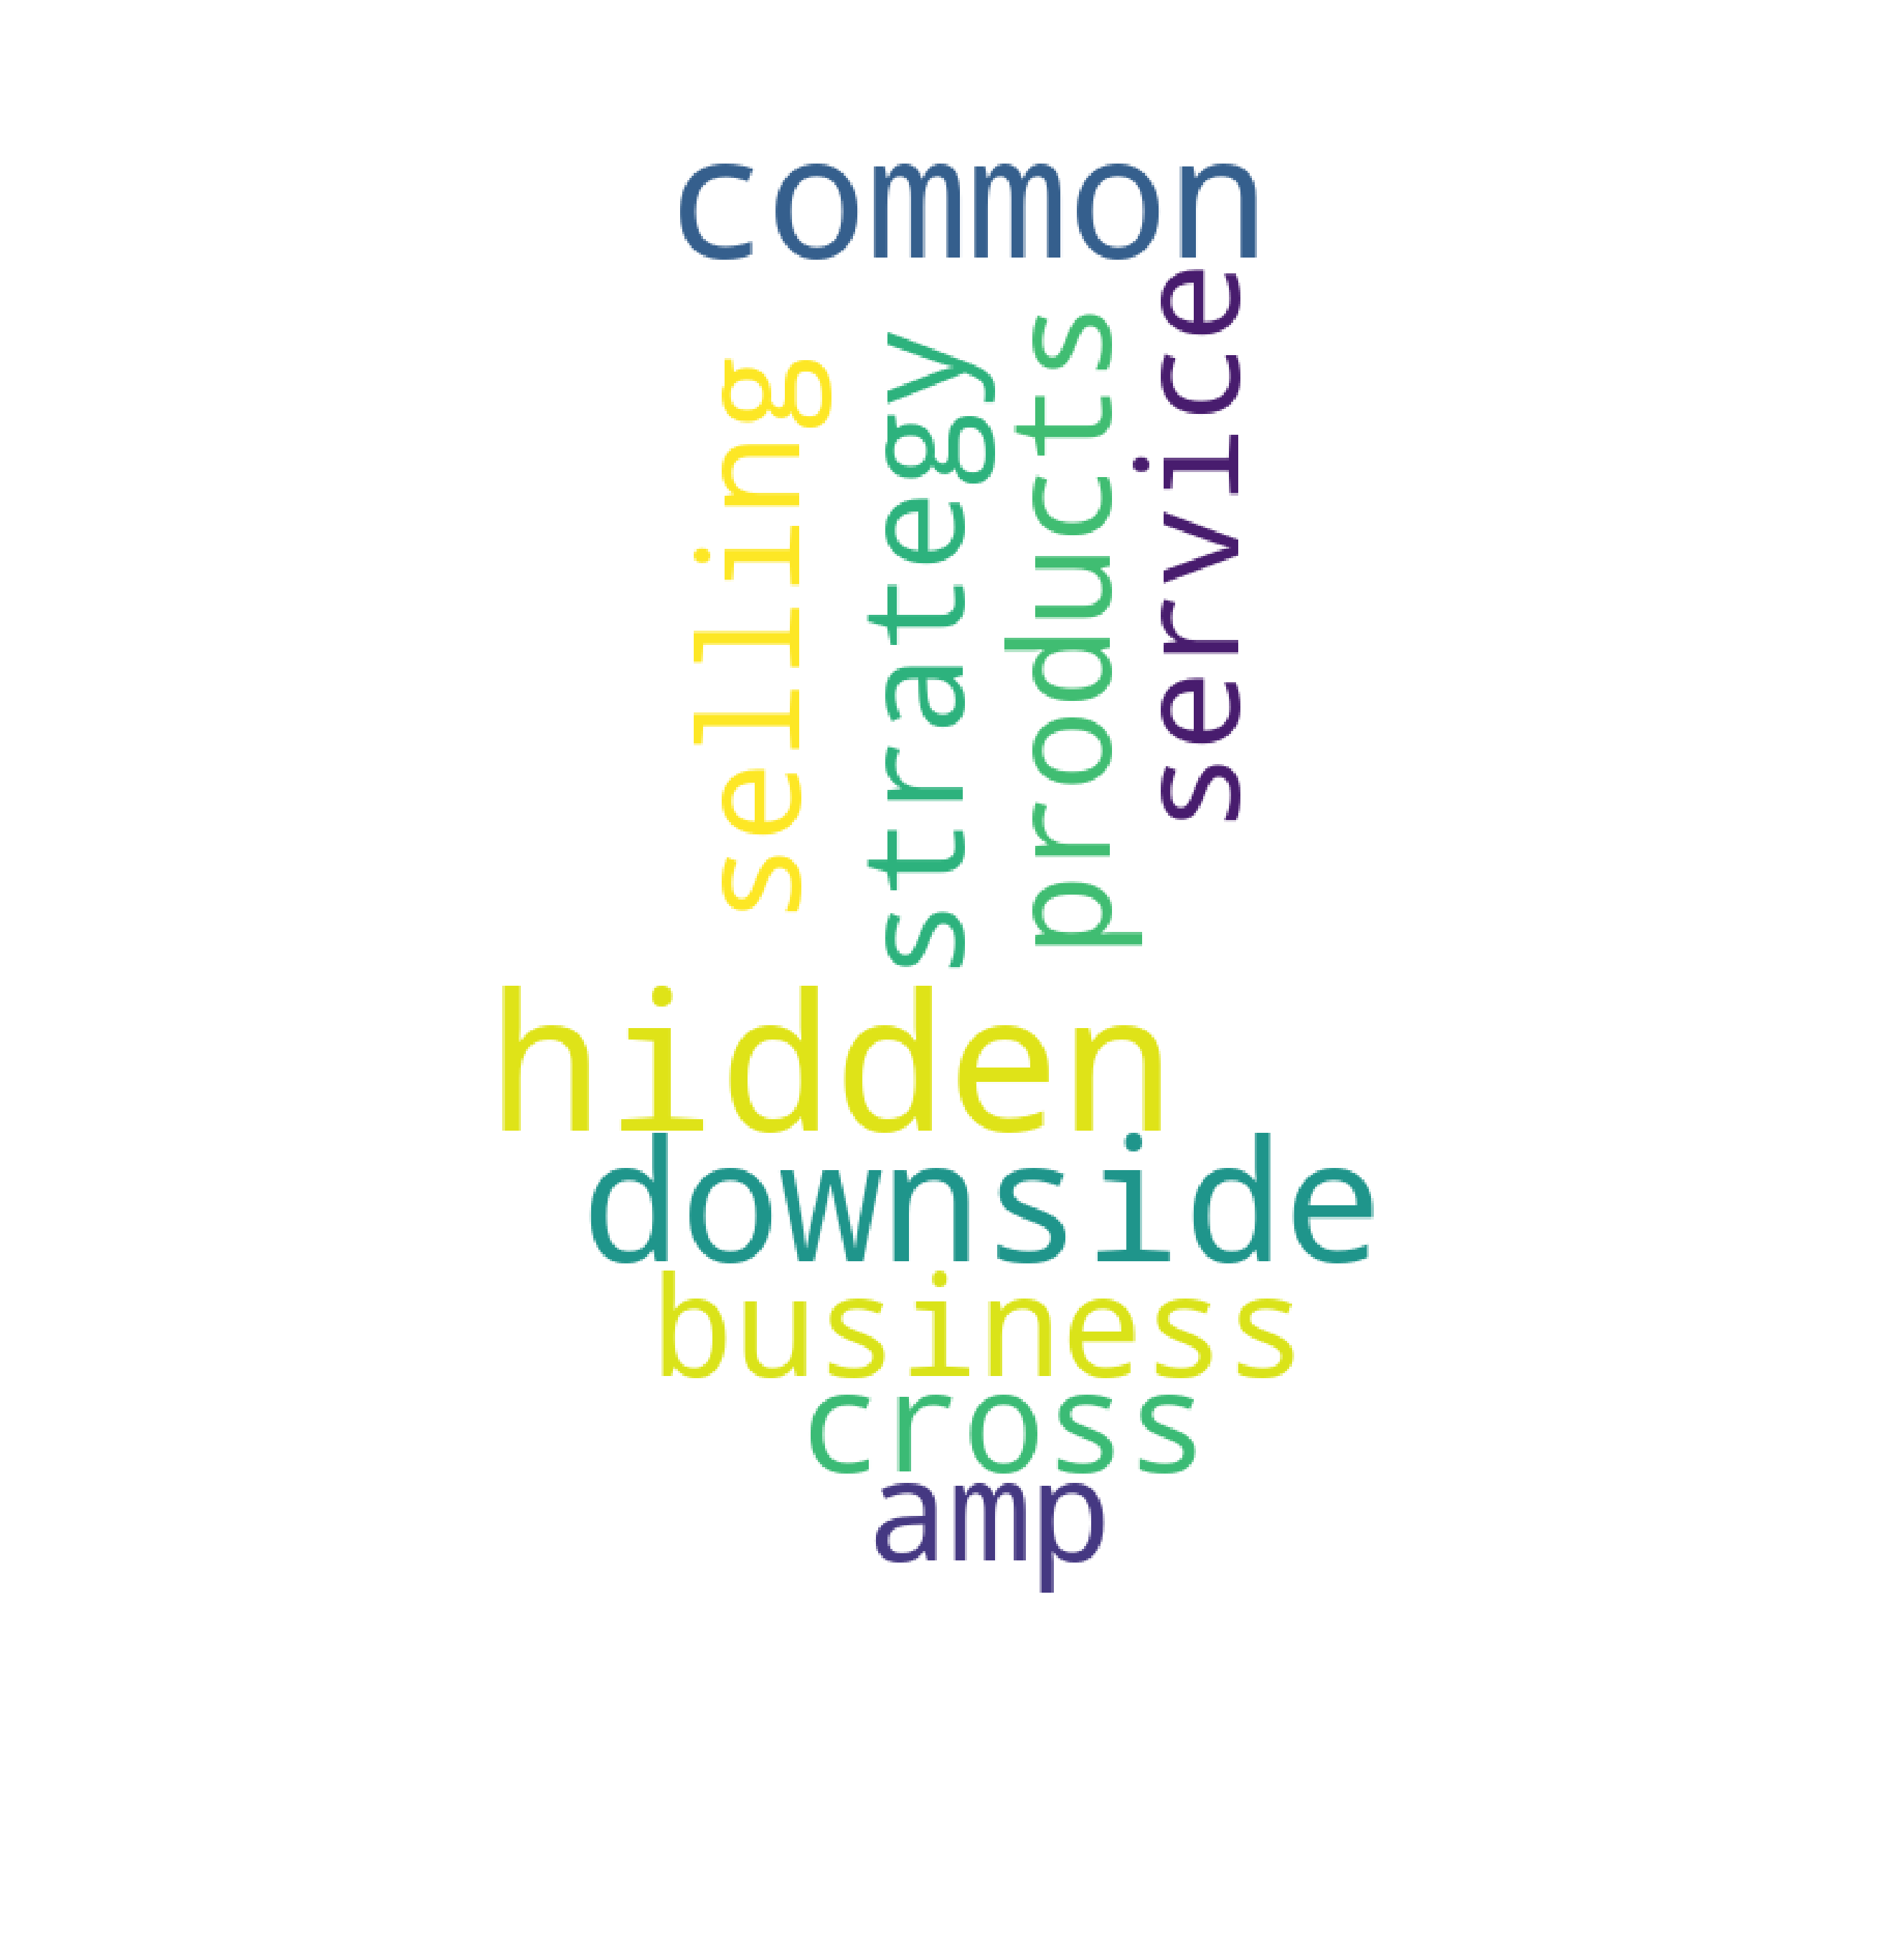

In [143]:
#Negative Word Cloud
# png mask drawn by author on 5/11/2020

# mask 
myMask = np.array(Image.open("data/myneg.png"))

wcNEG = WordCloud(background_color="white", max_words=20, mask=myMask, stopwords=stopwords).generate(' '.join(negDF['cleanTweet']))

plt.figure(figsize=(50,50))
plt.imshow(wcNEG)
#plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.savefig("data/wcNEG.png")
plt.show()

In [125]:
from collections import Counter

fDist = list(Counter(" ".join(negDF['cleanTweet']).split(" ")).items())

wordFreq = []

for k,v in fDist:
    wordFreq.append([k,v])

wordFreqDF = pd.DataFrame(wordFreq)

wordFreqDF=wordFreqDF.rename(columns={0: 'word',1: 'occurences'})
#wordFreqDF=wordfreqDF.word.str.findall('\w{3,}').str.join(' ')
wordFreqDF.sort_values('occurences', ascending=False).head(20)

,word,occurences
0,hidden,1
1,downside,1
2,common,1
3,business,1
4,strategy,1
5,cross,1
6,selling,1
7,products,1
8,amp,1
9,service,1


# V. Content analytics

## A.  Topic Modeling

Relies on Lda model to identify specific topic areas

K Value set at 14

Individual tweets do not align closely to any one topic

Words by Topic

- 0:  data , advises , caserta , force , business , analytics , kpa , job , partner , strateg
- 1:  strategy , help , business , thoughtspot , mobile , paolajohnsonts , process , read , share , making
- 2:  data , analytics , skill , candidate , technical , strong , demand , high , augmentedanalytics , start
- 3:  informed , market , carve , edge , distinct , competitive , well , collide , data , analytics
- 4:  data , analytics , engineer , senior , build , pipeline , passionate , custom , advertising , using
- 5:  analytics , business , open , matter , heart , disease , congenital , coding , adult , access
- 6:  data , analytics , register , cloud , multi , fcwnow , true , last , registra , workshop
- 7:  business , else , find , northpass , edisonventure , still , vision , people , go , ingredient
- 8:  business , amp , join , time , register , thursday , still , learn , unit , positively
- 9:  service , dynamic , tool , learn , reporting , relationship , lp , improve , visualisation , insight
- 10: analytics , history , case , previous , data , win , loss , legal , lawyer , judge
- 11: today , prioritize , adoption , model , nine , healthcare , join , step , patient , provider
- 12: business , strategy , integrity , tactic , replaces , marieforleo , caring , importance , objective , vide
- 13: data , analytics , memory , discus , evolution , gartner , inc , brazingo , database , watch


Average occurance of topic per tweet

- 0     0.101311
- 13    0.084352
- 7     0.083345
- 6     0.082905
- 4     0.081821
- 10    0.068050
- 1     0.067366
- 8     0.067319
- 2     0.066415
- 5     0.064514
- 11    0.050885
- 12    0.049734
- 9     0.033769
- 3     0.017463

Most prevalent topics

- 0     6
- 4     5
- 6     5
- 7     5
- 13    5
- 1     4
- 2     4
- 5     4
- 8     4
- 10    4
- 11    3
- 12    3
- 9     2
- 3     1





### 1.  Determine K Value

-16.299494093767244
-15.993211966113787
-14.120037321737167
-14.604682359403892
-13.716113452462029
-13.95764360216757
-13.283074953376028
-13.609923030350298
-13.268521513540582


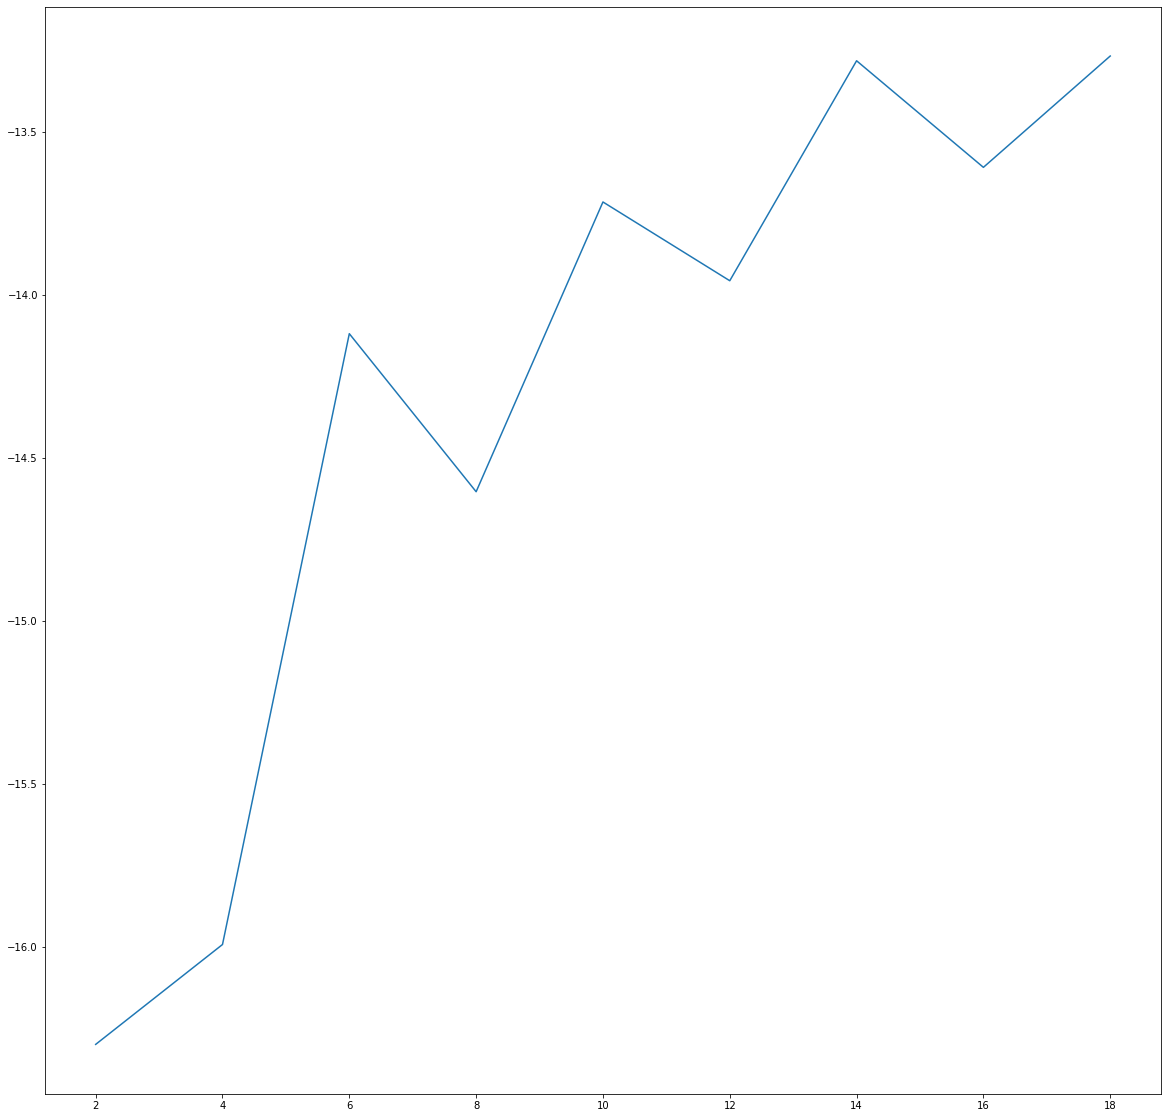

In [150]:
# determine k value

import numpy

numpy.random.seed(1)
kRange = list(range(2,20,2))
scores = []

for k in kRange:
    lModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    cm = CoherenceModel(model=lModel, corpus=corpus, dictionary=dictionary,coherence='u_mass')
    print((cm.get_coherence()))
    scores.append(cm.get_coherence())

plt.figure(figsize=(20,20))
plt.plot(kRange, scores)
plt.savefig("data/kValues.png")

### 2.  Calculate Topics

In [60]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=14, passes=50)

In [61]:
model.show_topics()

[(8,
  '0.047*"business" + 0.031*"amp" + 0.016*"join" + 0.016*"time" + 0.016*"register" + 0.016*"thursday" + 0.016*"still" + 0.016*"learn" + 0.016*"unit" + 0.016*"positively"'),
 (10,
  '0.043*"analytics" + 0.029*"history" + 0.029*"case" + 0.029*"previous" + 0.029*"data" + 0.015*"win" + 0.015*"loss" + 0.015*"legal" + 0.015*"lawyer" + 0.015*"judge"'),
 (2,
  '0.069*"data" + 0.052*"analytics" + 0.018*"skill" + 0.018*"candidate" + 0.018*"technical" + 0.018*"strong" + 0.018*"demand" + 0.018*"high" + 0.018*"augmentedanalytics" + 0.018*"start"'),
 (9,
  '0.048*"service" + 0.025*"dynamic" + 0.025*"tool" + 0.025*"learn" + 0.025*"reporting" + 0.025*"relationship" + 0.025*"lp" + 0.025*"improve" + 0.025*"visualisation" + 0.025*"insight"'),
 (12,
  '0.063*"business" + 0.042*"strategy" + 0.042*"integrity" + 0.042*"tactic" + 0.042*"replaces" + 0.042*"marieforleo" + 0.042*"caring" + 0.042*"importance" + 0.022*"objective" + 0.022*"vide"'),
 (6,
  '0.084*"data" + 0.057*"analytics" + 0.029*"register" + 

In [62]:
for i in range(0,14):
    topics=model.show_topic(i, 10)
    print((" , ".join([str(word[0]) for word in topics])))

data , advises , caserta , force , business , analytics , kpa , job , partner , strateg
strategy , help , business , thoughtspot , mobile , paolajohnsonts , process , read , share , making
data , analytics , skill , candidate , technical , strong , demand , high , augmentedanalytics , start
informed , market , carve , edge , distinct , competitive , well , collide , data , analytics
data , analytics , engineer , senior , build , pipeline , passionate , custom , advertising , using
analytics , business , open , matter , heart , disease , congenital , coding , adult , access
data , analytics , register , cloud , multi , fcwnow , true , last , registra , workshop
business , else , find , northpass , edisonventure , still , vision , people , go , ingredient
business , amp , join , time , register , thursday , still , learn , unit , positively
service , dynamic , tool , learn , reporting , relationship , lp , improve , visualisation , insight
analytics , history , case , previous , data , w

### 3. Visualize Topics

In [63]:

#Topic Model Visualization

# Software Packages

import pyLDAvis.gensim

# Visualize Topics

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.001449  0.222222  1       1        12.392346
1      0.122590 -0.009063  2       1        7.675032 
2     -0.060927 -0.002383  3       1        6.372282 
3     -0.018453 -0.015950  4       1        2.370164 
4     -0.093578 -0.022229  5       1        7.712325 
5      0.023413  0.027789  6       1        5.640055 
6     -0.084464  0.025392  7       1        8.640427 
7      0.101364 -0.027963  8       1        8.637597 
8      0.057924  0.005573  9       1        7.675557 
9      0.014756 -0.029465  10      1        3.704331 
10    -0.085576 -0.062601  11      1        8.605523 
11     0.016024 -0.099923  12      1        5.967581 
12     0.118384 -0.007251  13      1        4.667055 
13    -0.110009 -0.004148  14      1        9.939730 , topic_info=    Category       Freq            Term      Total  loglift  logprob
64   Default  11.000000  business        11.000000  30.0000  30.0000
0    Default  17.000000  analytics       17.000000  29.0000  29.0000
2    Default  20.000000  data            20.000000  28.0000  28.0000
79   Default  5.000000   strategy        5.000000   27.0000  27.0000
98   Default  2.000000   service         2.000000   26.0000  26.0000
60   Default  2.000000   importance      2.000000   25.0000  25.0000
61   Default  3.000000   learn           3.000000   24.0000  24.0000
51   Default  3.000000   help            3.000000   23.0000  23.0000
237  Default  1.000000   replaces        1.000000   22.0000  22.0000
238  Default  1.000000   tactic          1.000000   21.0000  21.0000
236  Default  1.000000   marieforleo     1.000000   20.0000  20.0000
235  Default  1.000000   integrity       1.000000   19.0000  19.0000
234  Default  1.000000   caring          1.000000   18.0000  18.0000
93   Default  3.000000   cloud           3.000000   17.0000  17.0000
117  Default  3.000000   amp             3.000000   16.0000  16.0000
105  Default  1.000000   market          1.000000   15.0000  15.0000
171  Default  3.000000   register        3.000000   14.0000  14.0000
104  Default  1.000000   informed        1.000000   13.0000  13.0000
221  Default  2.000000   advises         2.000000   12.0000  12.0000
222  Default  2.000000   caserta         2.000000   11.0000  11.0000
223  Default  2.000000   force           2.000000   10.0000  10.0000
280  Default  2.000000   insight         2.000000   9.0000   9.0000 
112  Default  2.000000   time            2.000000   8.0000   8.0000 
18   Default  2.000000   join            2.000000   7.0000   7.0000 
87   Default  2.000000   open            2.000000   6.0000   6.0000 
30   Default  1.000000   engineer        1.000000   5.0000   5.0000 
37   Default  1.000000   senior          1.000000   4.0000   4.0000 
214  Default  2.000000   discus          2.000000   3.0000   3.0000 
4    Default  2.000000   good            2.000000   2.0000   2.0000 
150  Default  1.000000   case            1.000000   1.0000   1.0000 
..       ...       ...    ...                 ...      ...      ... 
216  Topic14  1.390393   gartner         1.927208   1.9821  -3.6403 
215  Topic14  1.390393   evolution       1.927208   1.9821  -3.6403 
213  Topic14  1.390393   database        1.927208   1.9821  -3.6403 
212  Topic14  1.390393   brazingo        1.927208   1.9821  -3.6403 
257  Topic14  0.719163   l               1.255977   1.7510  -4.2996 
256  Topic14  0.719163   kristie         1.255977   1.7510  -4.2996 
255  Topic14  0.719163   intelb          1.255977   1.7510  -4.2996 
258  Topic14  0.719163   mann            1.255977   1.7510  -4.2996 
194  Topic14  0.719163   fill            1.255977   1.7510  -4.2996 
198  Topic14  0.719163   smartcontracts  1.255977   1.7510  -4.2996 
197  Topic14  0.719163   like            1.255977   1.7510  -4.2996 
196  Topic14  0.719163   google          1.255977   1.7510  -4.2996 
174  Topic14  0.719163   figured         1.255977   1.751

In [64]:
# Visualize topic prevalance per tweet

# Assign Topic for each row

ldaCorpus14 = model[corpus]
results14 = []

for i in ldaCorpus14:
    results14.append(i)
    
results14[:3]

[[(2, 0.90714186)], [(6, 0.8839273)], [(11, 0.9155835)]]

In [65]:
# build document distribution table

def listify(l):
    res = []
    for j in l:
        d = dict([(i,0) for i in range(14)])
        d.update(j)
        res.append(list(d.values()))
    return res



In [66]:
z = listify(results14)

In [67]:
topicDTD = pd.DataFrame(z)
topicDTD.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.907142,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.883927,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.915583,0.0,0.0


In [154]:
(topicDTD.sum(axis=0).sort_values(ascending=False)/len(topicDTD))

0     0.101311
13    0.084352
7     0.083345
6     0.082905
4     0.081821
10    0.068050
1     0.067366
8     0.067319
2     0.066415
5     0.064514
11    0.050885
12    0.049734
9     0.033769
3     0.017463
dtype: float64

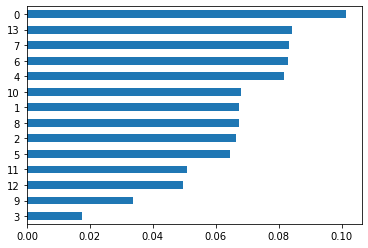

In [68]:
(topicDTD.sum(axis=0).sort_values(ascending=True)/len(topicDTD)).plot(kind='barh')


In [69]:
topTopics14 = [max(collection, key=lambda x: x[1])[0] for collection in results14]
topTopics14[:5]

[2, 6, 11, 7, 4]

In [70]:
# Visualize best topic description for each tweet

cleanTweetsList = cleanDF['cleanTweet'].values
cleanTweetDF = pd.DataFrame(cleanTweetsList)
cleanTweetDF = cleanTweetDF.rename(columns = {0: 'clean tweet'})

In [158]:

dTweetsList = cleanDF.values
dTweetDF = pd.DataFrame(dTweetsList)
dTweetDF = dirtyTweetDF.rename(columns = {0: 'messy tweet'})
topTopics14DF = pd.DataFrame(topTopics14)
topTopics14DF = topTopics14DF.rename(columns = {0: 'top topic'})
summaryTopics14DF = cleanTweetDF.join(topTopics14DF)

In [159]:
summaryTopics14DF.head()

,clean tweet,top topic
0,good data analytics candidates strong technical skills high demand,2
1,hiring gt data scientist bigdata iot analytics,6
2,able join webinar today another planned thursday ensure revisit bus,11
3,ups data redefining supply chain techrepublic supplychain bigdata,7
4,netflix looking senior analytics engineer platform data scien los gatos,4


In [155]:
summaryTopics14DF['top topic'].value_counts().sort_values(ascending=False)

0     6
4     5
6     5
7     5
13    5
1     4
2     4
5     4
8     4
10    4
11    3
12    3
9     2
3     1
Name: top topic, dtype: int64

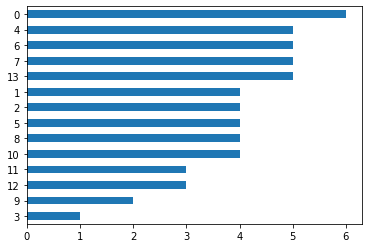

In [73]:
summaryTopics14DF['top topic'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [74]:
seven=summaryTopics14DF[(summaryTopics14DF['top topic']==7)]

In [75]:
df7 = seven.join(topicDTD)

In [76]:
df7.sort_values(7,ascending=False).head(10)

,clean tweet,top topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13
9,edisonventure vision strategy people ingredients makes business go find else keeps northpass,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.928570,0.0,0.0,0.0,0.0,0.0,0.0
48,ventanaresearch still time register join dmenningervr online conversation succeed hybrid cloud,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.922618,0.0,0.0,0.0,0.0,0.0,0.0
52,wondering transportation management system tms essential business discuss benefit,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.907142,0.0,0.0,0.0,0.0,0.0,0.0
3,ups data redefining supply chain techrepublic supplychain bigdata,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.896824,0.0,0.0,0.0,0.0,0.0,0.0
25,meraswater reopening post coronavirus guide small business,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.883927,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
DF = cleanTweetDF.join(topicDTD)

In [78]:
DF.head(1)

,clean tweet,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,good data analytics candidates strong technical skills high demand,0.0,0.0,0.907142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
DF.iloc[:,1:].idxmax()

0     54
1     16
2     0 
3     12
4     22
5     17
6     27
7     9 
8     51
9     33
10    20
11    6 
12    34
13    37
dtype: int64

In [80]:
topTopicProbability = pd.DataFrame(DF.iloc[:,1:].mean()).rename(columns={0: 'topic probability'})
topTopicProbability

,topic probability
0,0.101311
1,0.067366
2,0.066415
3,0.017463
4,0.081821
5,0.064514
6,0.082905
7,0.083345
8,0.067319
9,0.033769


In [82]:
maxValueIndex = DF.iloc[:,1:].idxmax()

topTweets = [ DF['clean tweet'].iloc[i] for i in maxValueIndex ]
topTweetsDF = pd.DataFrame(topTweets).rename(columns={0: 'tweet'})
topTweetsDF



,tweet
0,ps jobslive job head data insight amp analytics location london salary kpa kpa jobs hiri
1,paolajohnsonts vikas gautam shares process amp characteristics critical making thoughtspot mobile work read
2,good data analytics candidates strong technical skills high demand
3,distinct markets data analytics collide well informed carve competitive edge
4,senior data engineer advertising analytics data pipeline passionate using data build custom
5,open access research data analytics adult congenital heart disease coding matters
6,multi cloud data analytics future business reap true benefits multi cloud str
7,edisonventure vision strategy people ingredients makes business go find else keeps northpass
8,korsengineering still time register join thursday amp learn parkohio automotive business unit positively transf
9,dynamic reporting data visualisation tools improve gp lp relationship services


In [83]:
bestTweetperTopic = topTweetsDF.join(topTopicProbability).reset_index().rename(columns={'index': 'topic'})
bestTweetperTopic

,topic,tweet,topic probability
0,0,ps jobslive job head data insight amp analytics location london salary kpa kpa jobs hiri,0.101311
1,1,paolajohnsonts vikas gautam shares process amp characteristics critical making thoughtspot mobile work read,0.067366
2,2,good data analytics candidates strong technical skills high demand,0.066415
3,3,distinct markets data analytics collide well informed carve competitive edge,0.017463
4,4,senior data engineer advertising analytics data pipeline passionate using data build custom,0.081821
5,5,open access research data analytics adult congenital heart disease coding matters,0.064514
6,6,multi cloud data analytics future business reap true benefits multi cloud str,0.082905
7,7,edisonventure vision strategy people ingredients makes business go find else keeps northpass,0.083345
8,8,korsengineering still time register join thursday amp learn parkohio automotive business unit positively transf,0.067319
9,9,dynamic reporting data visualisation tools improve gp lp relationship services,0.033769


# VI. Network analytics

## A.  Overall Mention Network

- Built upon mentions within each tweet
- Examination of closeness, betweenness
- Displayed using xxx, no label overlaps, and type size by xxx

- Insert image here


## B.  Overall Co-Hashtag Network

- Built upon hashtags within each tweet
- Examination of closeness, betweeness
- Results posted in section IX
- Displayed using xxx, no label overlaps, and type size by xxx


## C.  Link Network

- Exploratory in nature
- Built upon user url links and user name
- Examination of closeness, betweeness
- Results posted in section IX
- Displayed using xxx, no label overlaps, and type size by xxx




# VIII.  Advanced Topic Analysis

## A. Word Cloud by Topic

- Generated using words from each topic
- Visualization of prominent words by topic

## B. Drill down of Topic Co-Hashtag Network

- Built by extracting hashtags from topic subgroup
- Examination of degree centrality

## C. Combined Results:  Potential Topics

- 10 Topics had co-hashtag networks, of which 9 were relevant
- 4 Topics did not have co-hashtag networks
- 0: Jobs
- 4: Internet of Things Data
- 6: Internet of Things AI
- 7: Supply Chain Big Data
- 13: Smart Contracts Dashboards
- 2: Data Literacy
- 5: Data Science
- 8: Procurement


In [160]:
# Align top topics to original tweets for additional network analysis pre-processing

dTweetsList = cleanDF.values
dTweetDF = pd.DataFrame(dTweetsList)
dTweetDF = dirtyTweetDF.rename(columns = {0: 'messy tweet'})
topTopics14DF = pd.DataFrame(topTopics14)
topTopics14DF = topTopics14DF.rename(columns = {0: 'top topic'})
summaryTopics14DF = cleanTweetDF.join(topTopics14DF)
dTopTopics = dTweetDF.join(topTopics14DF)
dTopTopics.head(1)

,dirty tweet,1,2,3,4,5,6,7,8,9,10,11,12,top topic
0,"Good data and analytics candidates with strong technical skills are in very high demand, so what are you doing that… https://t.co/W5GnrUB0vt",Tue May 12 16:30:00 +0000 2020,KDRrecUSA,KDR Recruitment USA,https://www.kdrrecruitment.com/usa-recruiting.aspx,good data analytics candidates strong technical skills high demand,"[good, data, analytics, candidates, strong, technical, skills, high, demand]",21,140,[],0.6908,0.453,0.109,2


In [162]:
d0=dTopTopics[(dTopTopics['top topic']==0)]

In [163]:
# Automated process to generate mention  network file for each topic

for t in range(0,14):
    b = str("d"+str(t))
    b=dTopTopics[(dTopTopics['top topic']==t)]
    tweets = b.values
    tweets[:1]
    mention = []
    for tweet in tweets:
        mention.append([tweet[2], tweet[0]])
    filename = str("data/mention"+str(t)+"network.csv")
    openfile = open(filename, "w", newline='')

    w=csv.writer(openfile)

    for tweet in mention:
        a = re.findall(r"(?<=@)\w+", tweet[1])
        for i in a:
            w.writerow([tweet[0],i])
            #print([tweet[0], i])
    openfile.close()



In [164]:
# Automated process to generate co-hashtag network file for each topic

for t in range(0,14):
    b = str("d"+str(t))
    b=dTopTopics[(dTopTopics['top topic']==t)]
    tweets = b.values
    tweets[:1]
    hashtagNetwork = []
    for tweet in tweets:
        data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
        hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
        hashtagNetwork.append(hashtag)

    from itertools import combinations

    cohashtags = [x for d in hashtagNetwork for x in combinations(d,2)]
    cohashtags[:10]
    filename2 = str("data/cohashtag"+str(t)+"network.csv")
    outfile = open(filename2, "w", newline='')
    w = csv.writer(outfile)
    for i in cohashtags:
        w.writerow(i)
    outfile.close()

# IX. Storytelling & Conclusion

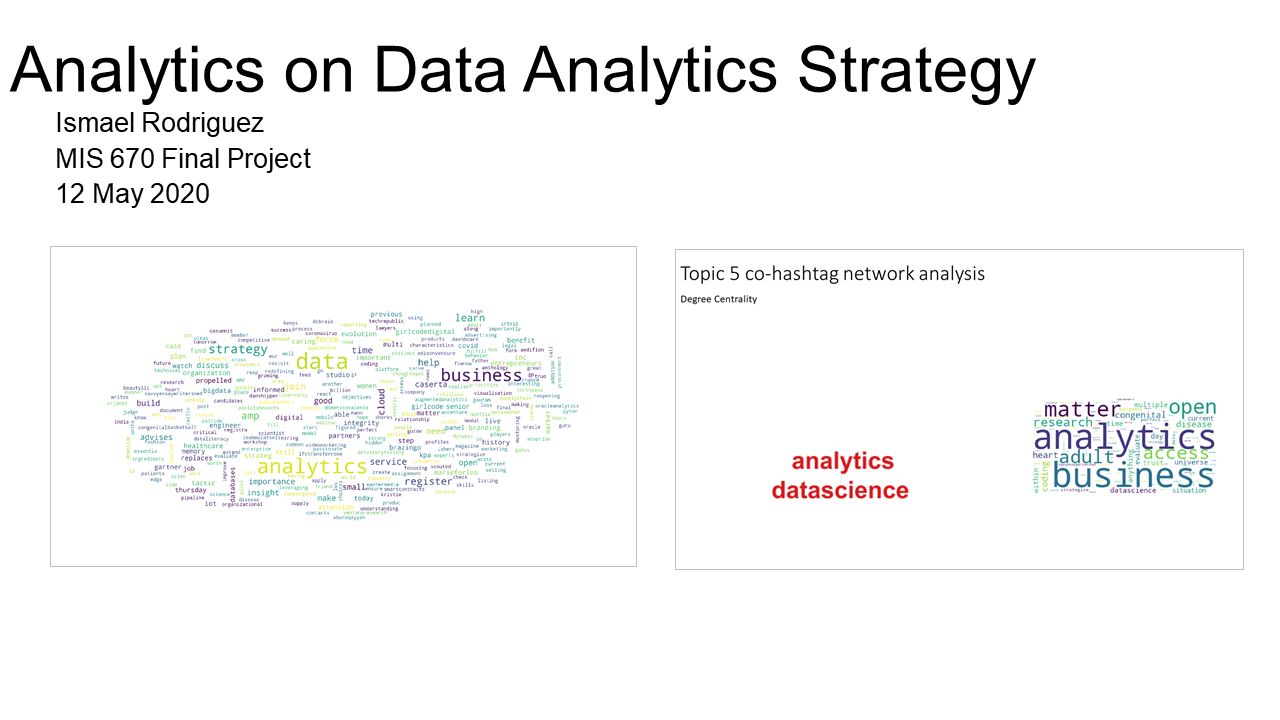

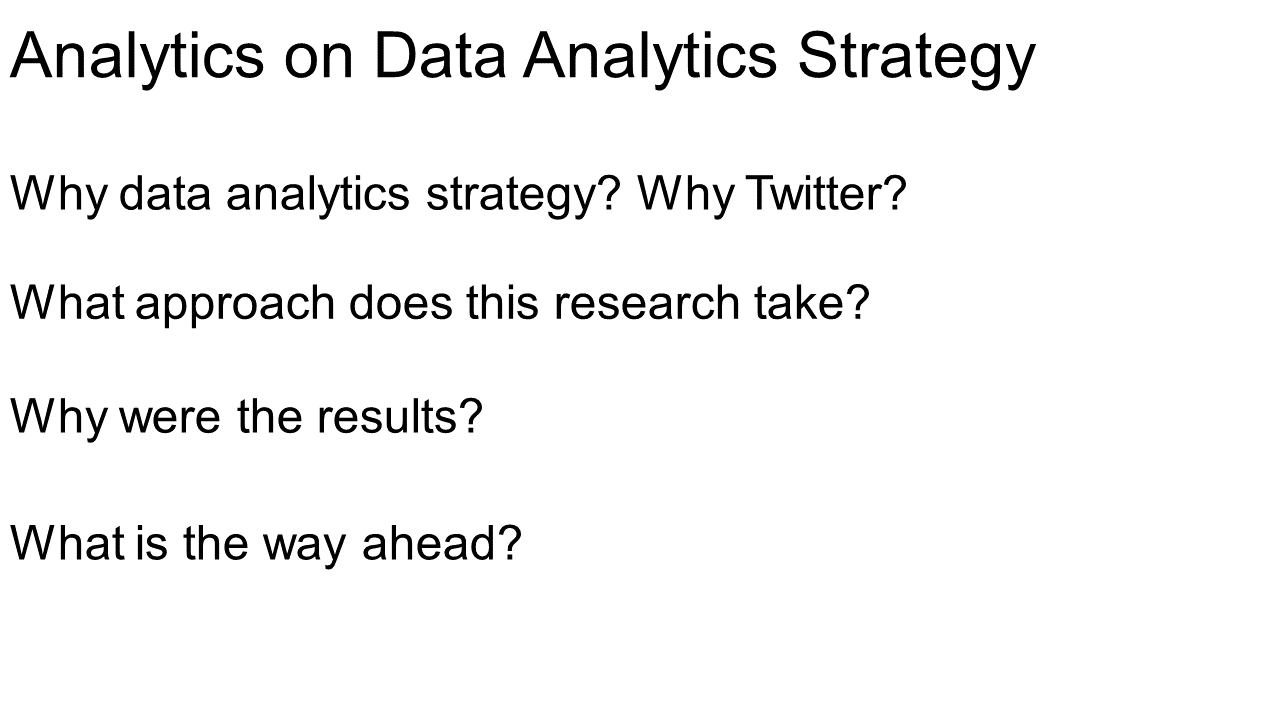

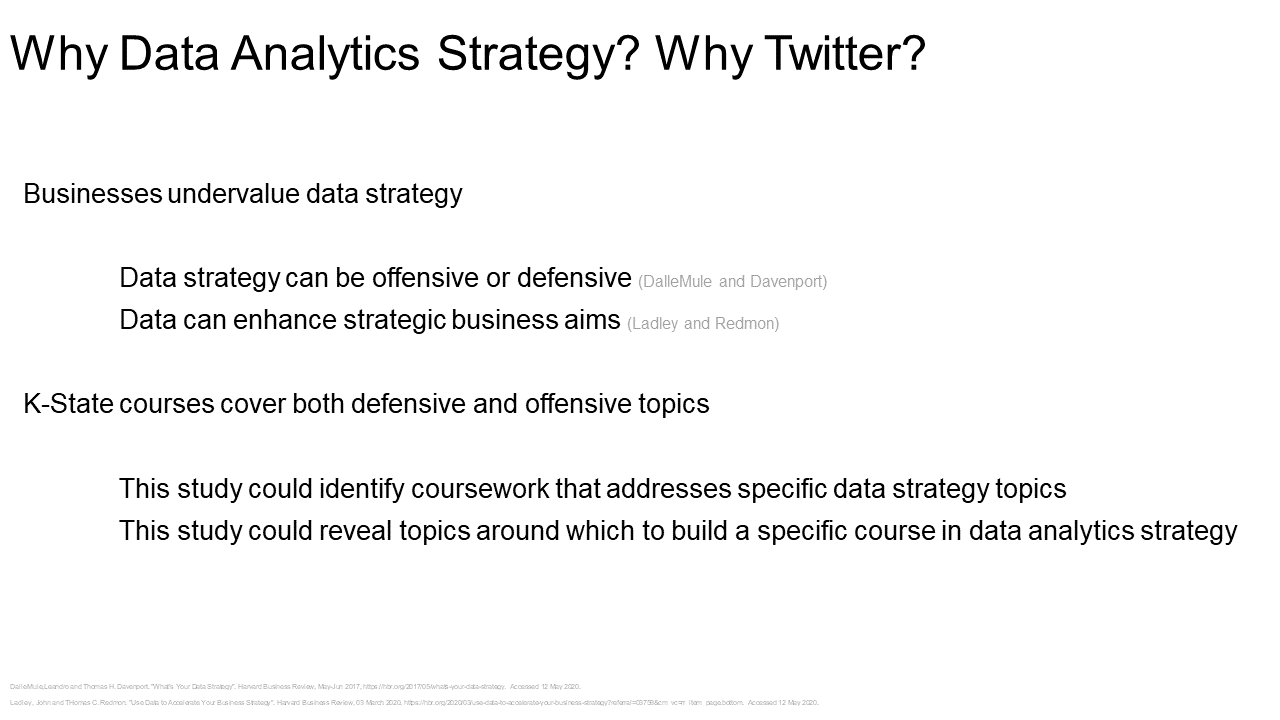

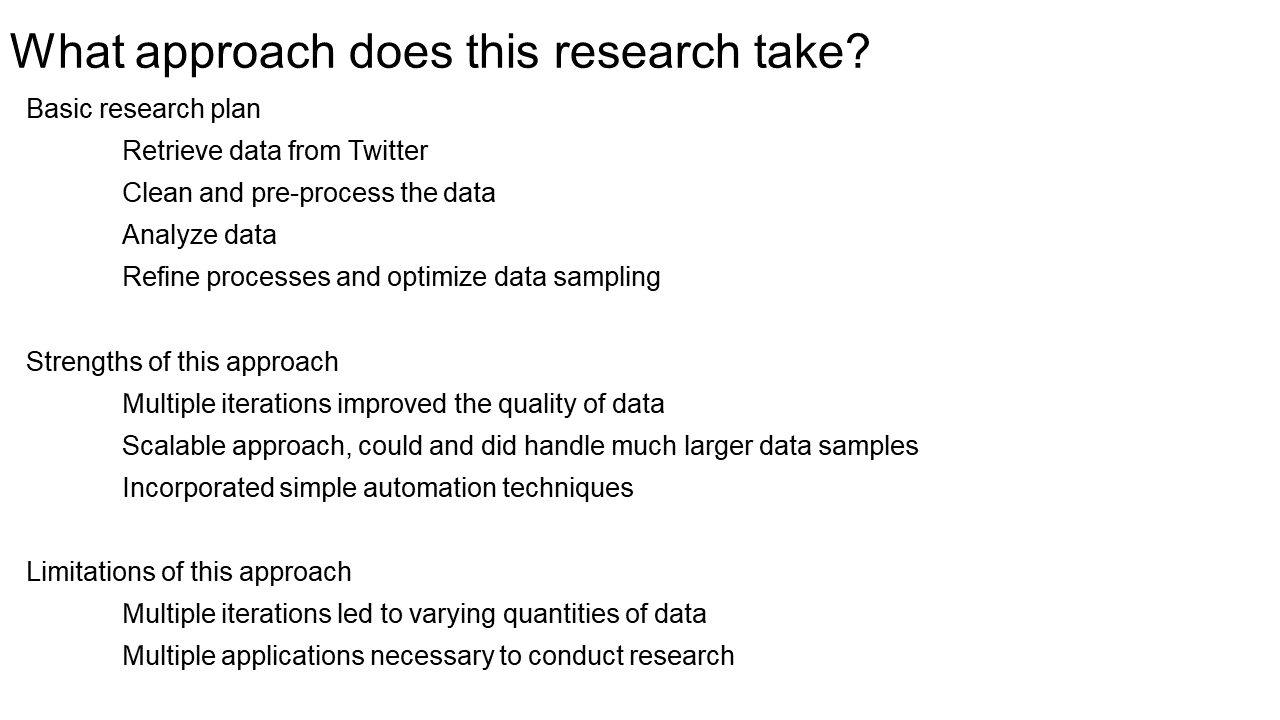

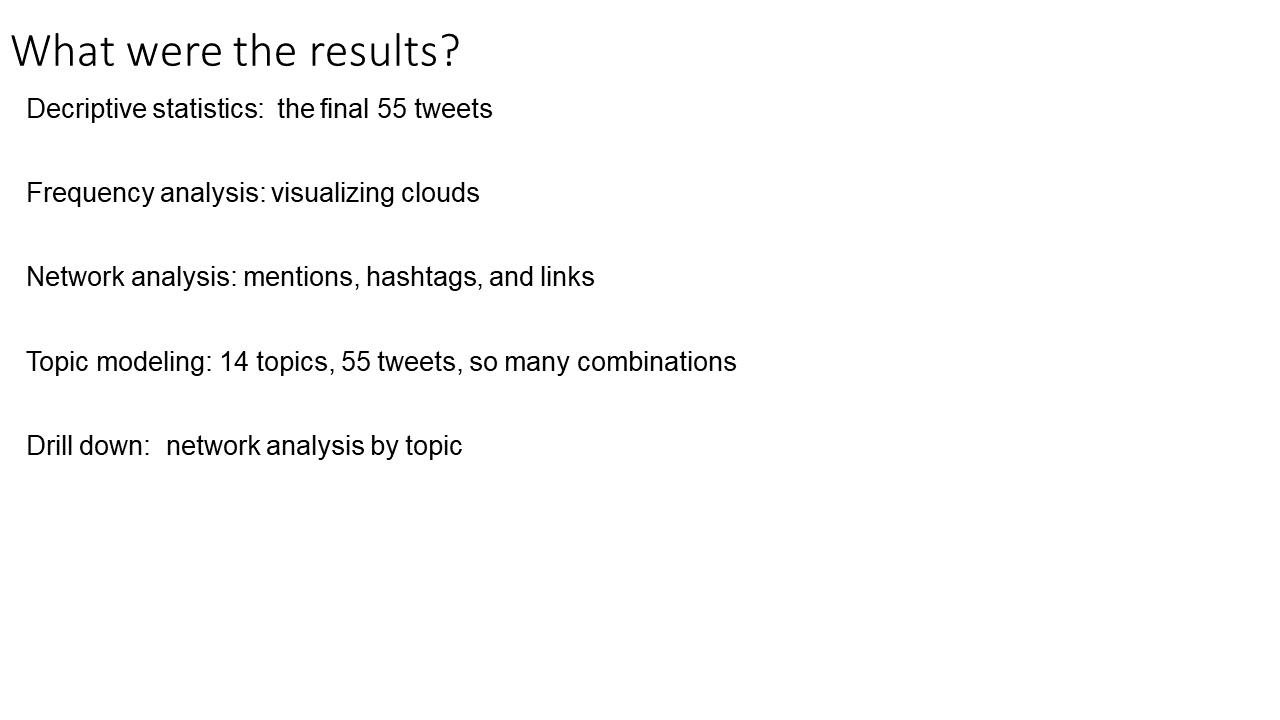

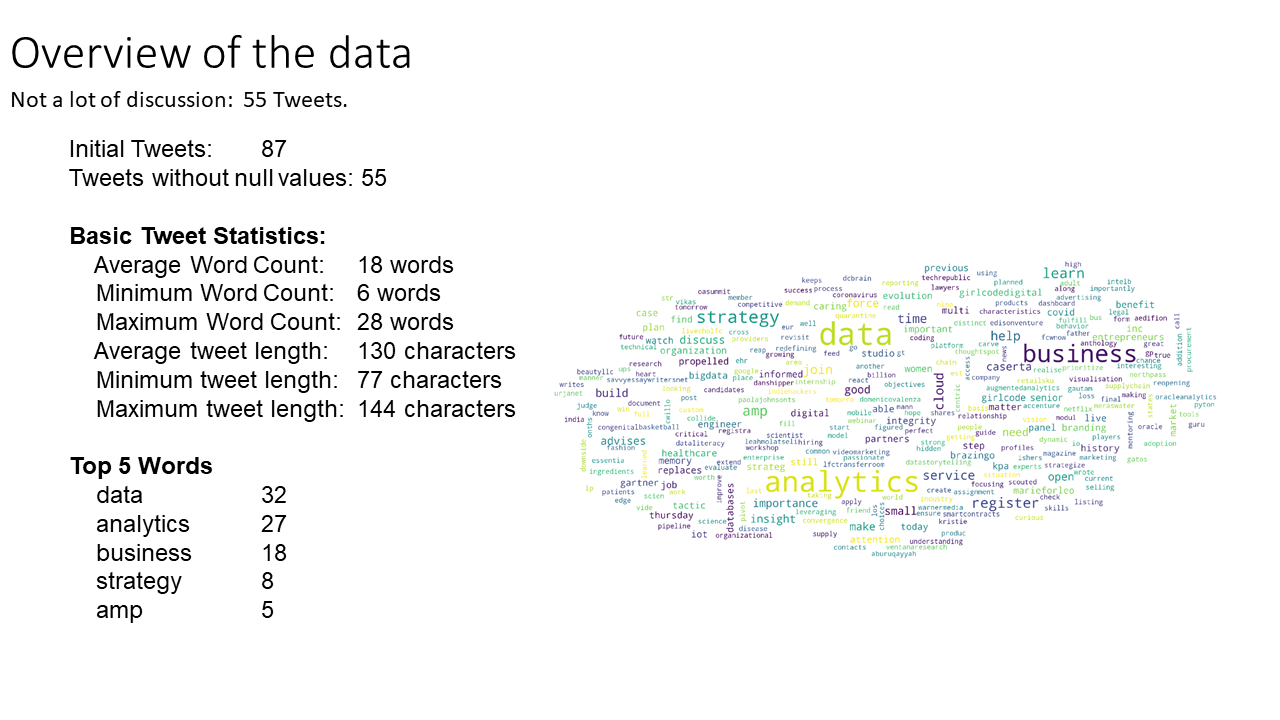

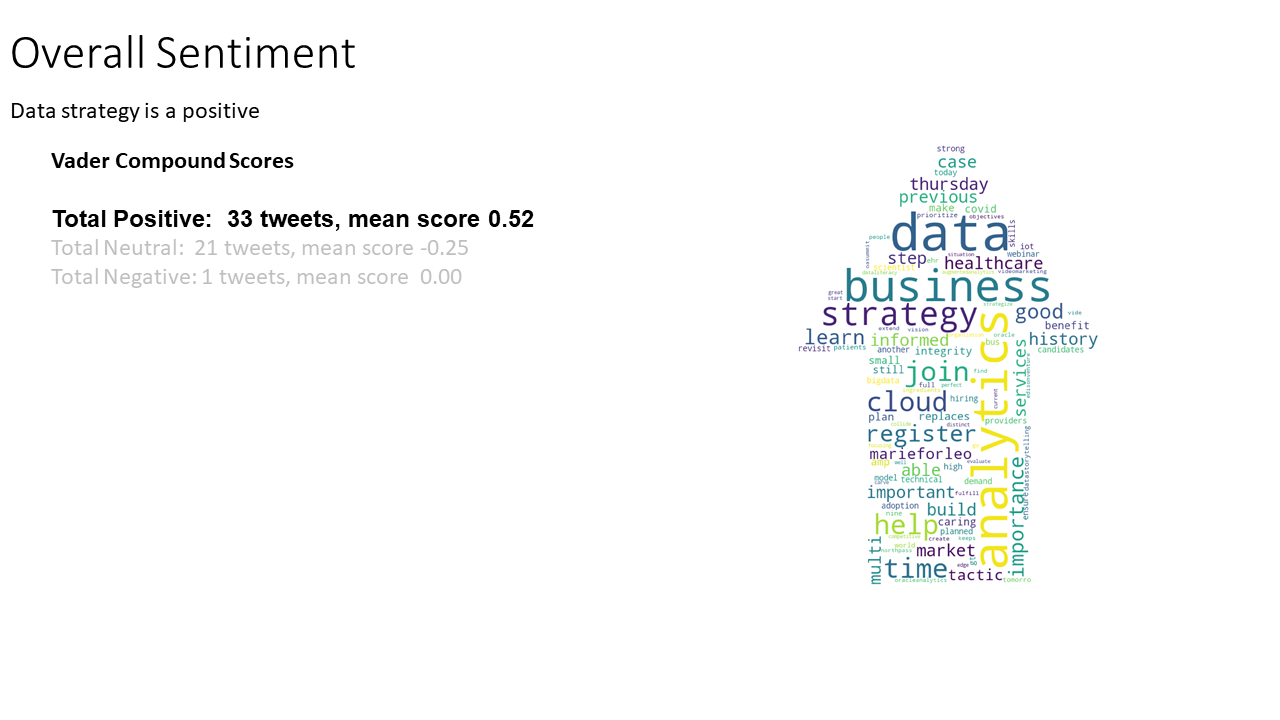

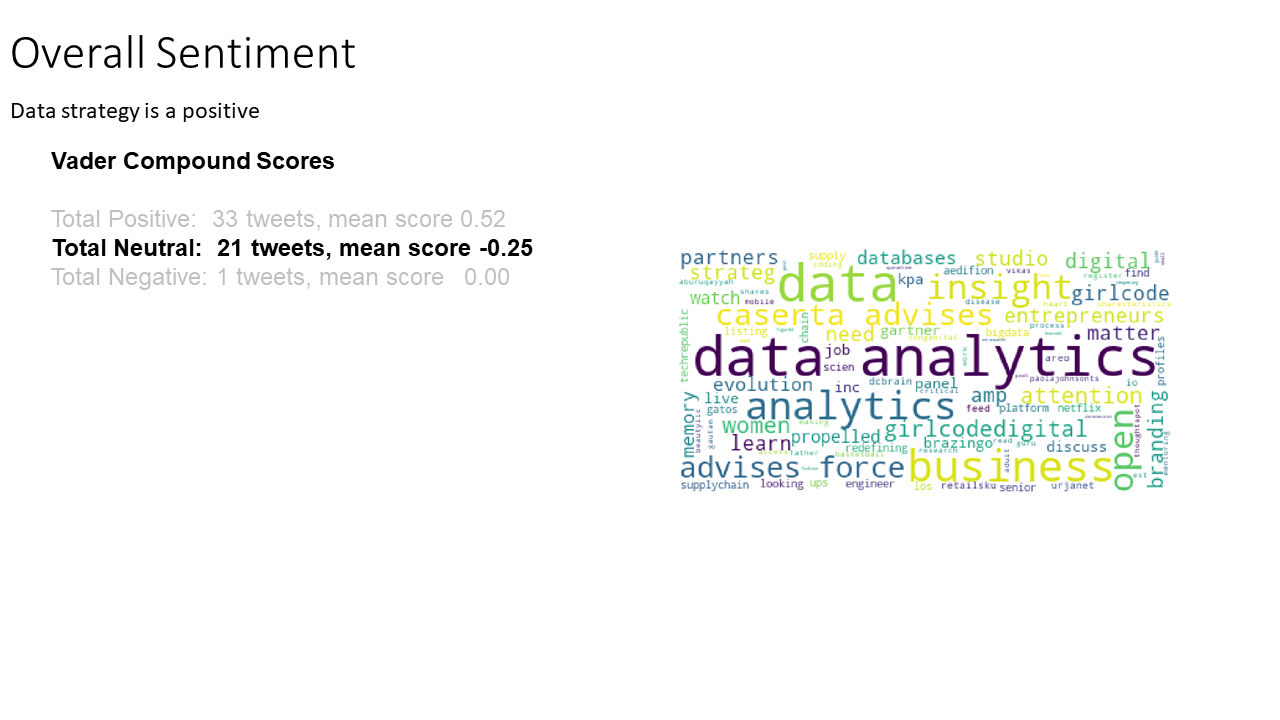

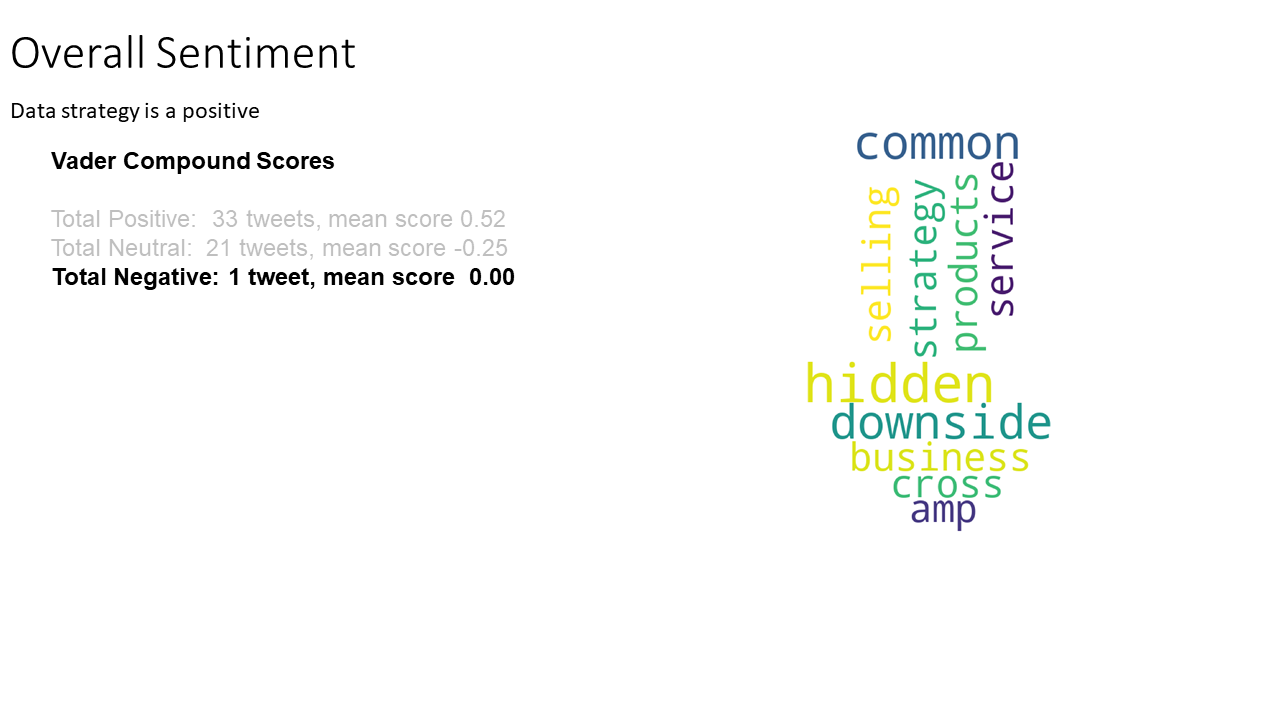

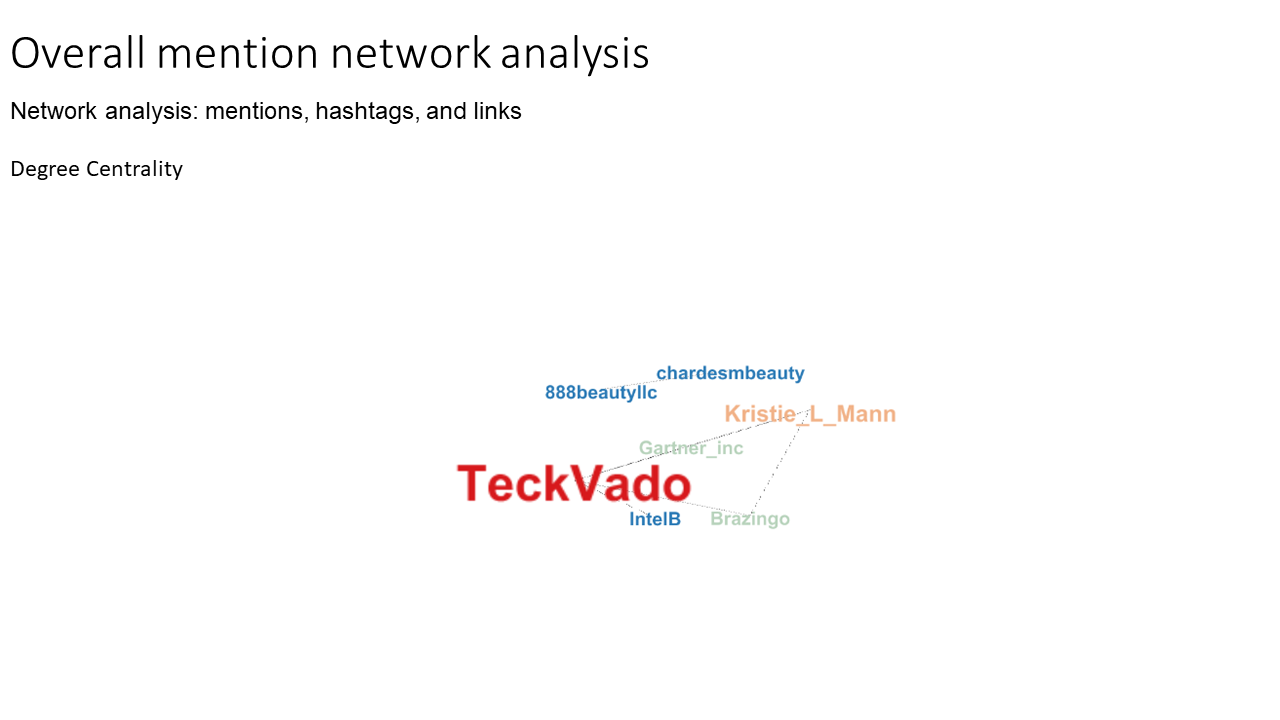

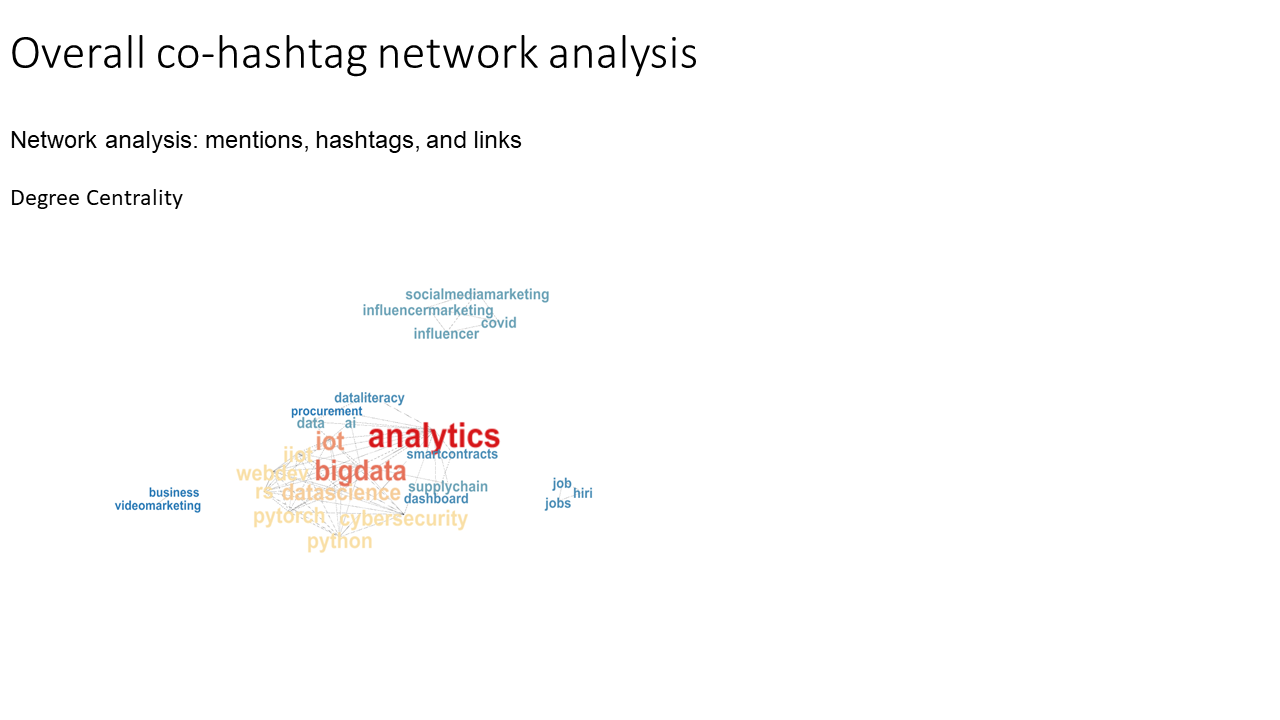

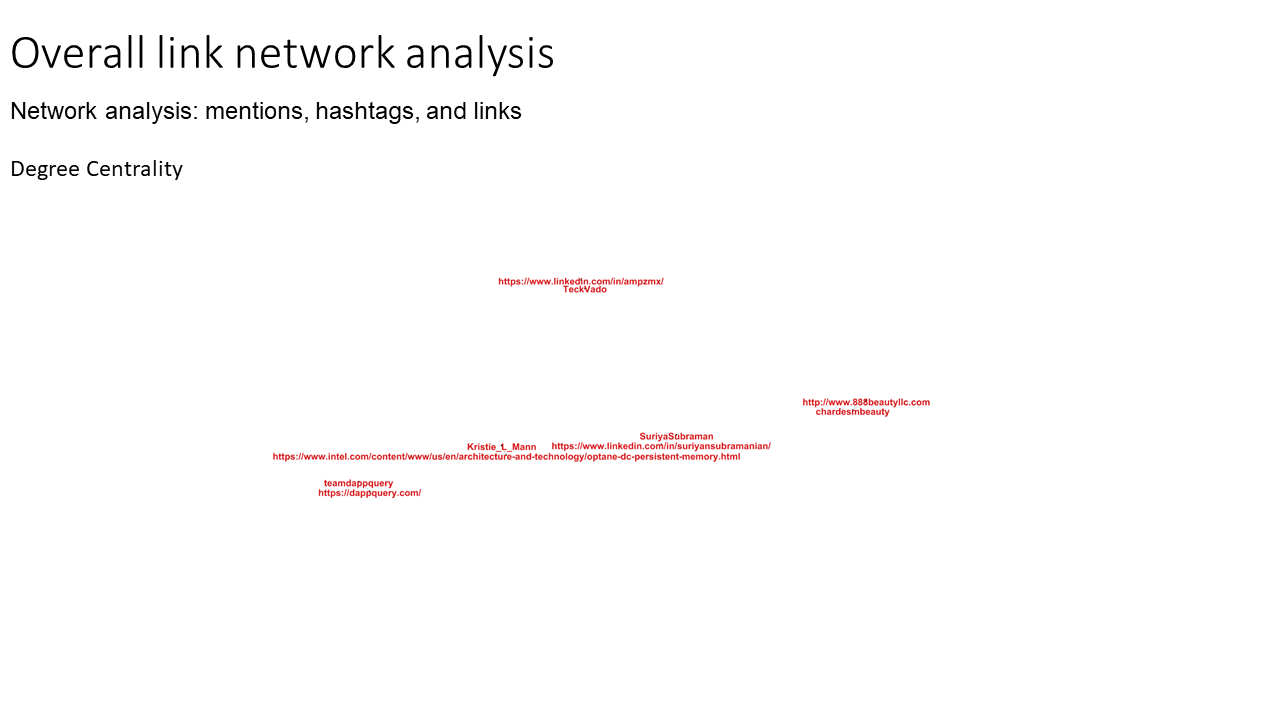

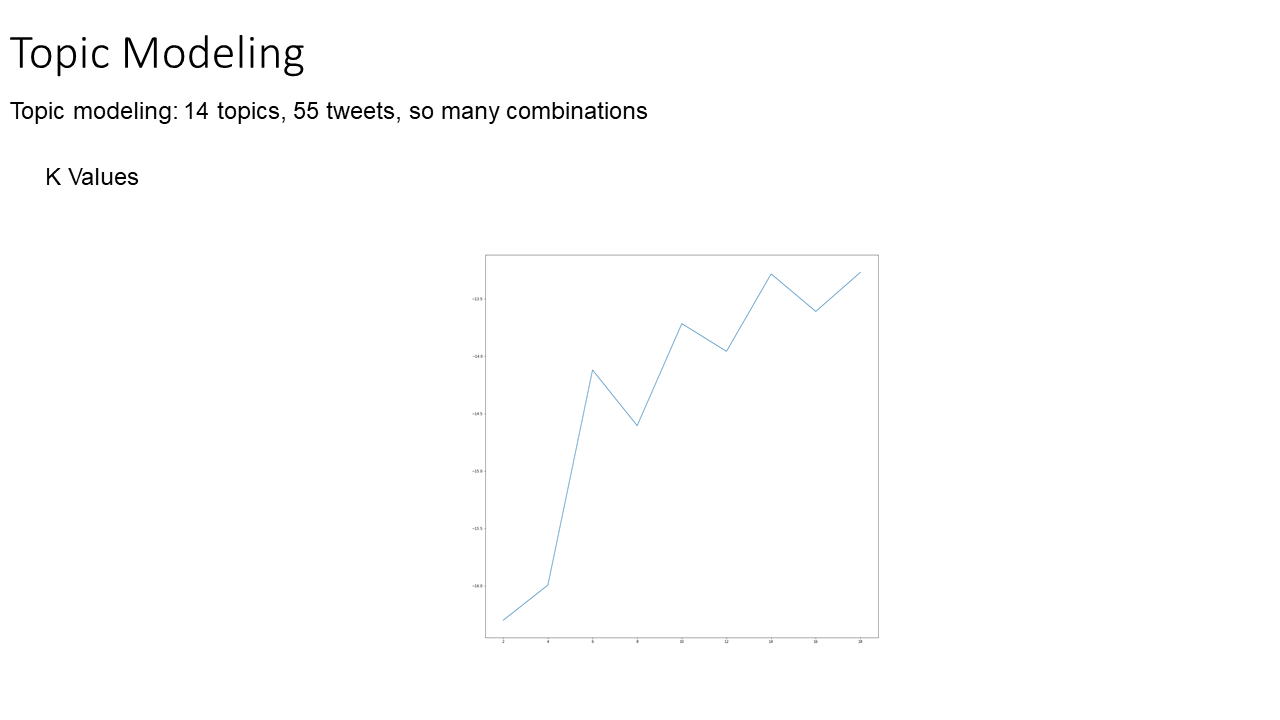

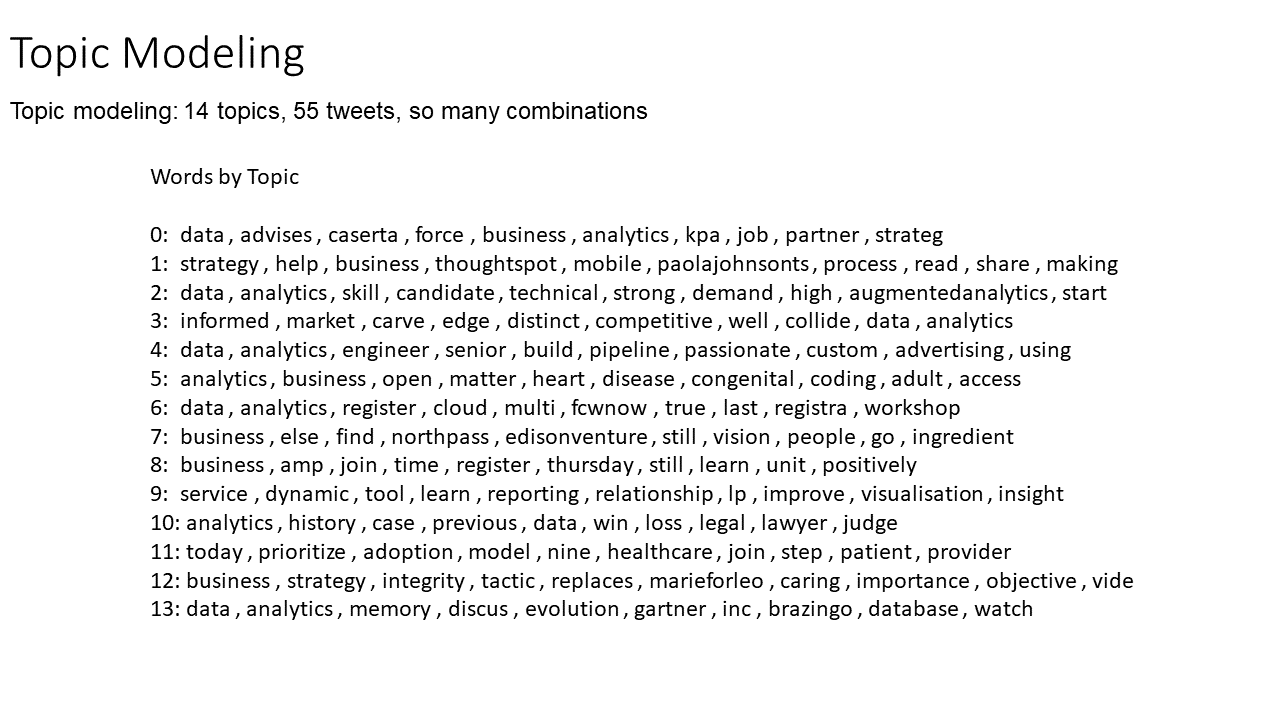

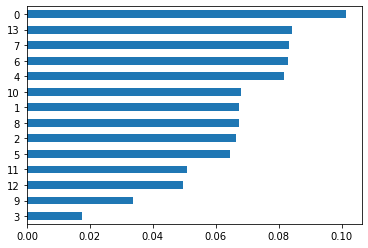

In [68]:
(topicDTD.sum(axis=0).sort_values(ascending=True)/len(topicDTD)).plot(kind='barh')


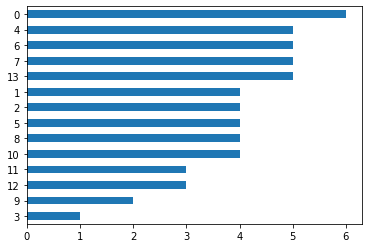

In [73]:
summaryTopics14DF['top topic'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [170]:

#Topic Model Visualization

# Software Packages

import pyLDAvis.gensim

# Visualize Topics

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.001449  0.222222  1       1        12.392346
1      0.122590 -0.009063  2       1        7.675032 
2     -0.060927 -0.002383  3       1        6.372282 
3     -0.018453 -0.015950  4       1        2.370164 
4     -0.093578 -0.022229  5       1        7.712325 
5      0.023413  0.027789  6       1        5.640055 
6     -0.084464  0.025392  7       1        8.640427 
7      0.101364 -0.027963  8       1        8.637597 
8      0.057924  0.005573  9       1        7.675557 
9      0.014756 -0.029465  10      1        3.704331 
10    -0.085576 -0.062601  11      1        8.605523 
11     0.016024 -0.099923  12      1        5.967581 
12     0.118384 -0.007251  13      1        4.667055 
13    -0.110009 -0.004148  14      1        9.939731 , topic_info=    Category       Freq            Term      Total  loglift  logprob
64   Default  11.000000  business        11.000000  30.0000  30.0000
0    Default  17.000000  analytics       17.000000  29.0000  29.0000
2    Default  20.000000  data            20.000000  28.0000  28.0000
79   Default  5.000000   strategy        5.000000   27.0000  27.0000
98   Default  2.000000   service         2.000000   26.0000  26.0000
60   Default  2.000000   importance      2.000000   25.0000  25.0000
61   Default  3.000000   learn           3.000000   24.0000  24.0000
51   Default  3.000000   help            3.000000   23.0000  23.0000
237  Default  1.000000   replaces        1.000000   22.0000  22.0000
238  Default  1.000000   tactic          1.000000   21.0000  21.0000
236  Default  1.000000   marieforleo     1.000000   20.0000  20.0000
235  Default  1.000000   integrity       1.000000   19.0000  19.0000
234  Default  1.000000   caring          1.000000   18.0000  18.0000
93   Default  3.000000   cloud           3.000000   17.0000  17.0000
117  Default  3.000000   amp             3.000000   16.0000  16.0000
105  Default  1.000000   market          1.000000   15.0000  15.0000
171  Default  3.000000   register        3.000000   14.0000  14.0000
104  Default  1.000000   informed        1.000000   13.0000  13.0000
221  Default  2.000000   advises         2.000000   12.0000  12.0000
222  Default  2.000000   caserta         2.000000   11.0000  11.0000
223  Default  2.000000   force           2.000000   10.0000  10.0000
280  Default  2.000000   insight         2.000000   9.0000   9.0000 
112  Default  2.000000   time            2.000000   8.0000   8.0000 
18   Default  2.000000   join            2.000000   7.0000   7.0000 
87   Default  2.000000   open            2.000000   6.0000   6.0000 
30   Default  1.000000   engineer        1.000000   5.0000   5.0000 
37   Default  1.000000   senior          1.000000   4.0000   4.0000 
214  Default  2.000000   discus          2.000000   3.0000   3.0000 
4    Default  2.000000   good            2.000000   2.0000   2.0000 
150  Default  1.000000   case            1.000000   1.0000   1.0000 
..       ...       ...    ...                 ...      ...      ... 
216  Topic14  1.390393   gartner         1.927208   1.9821  -3.6403 
215  Topic14  1.390393   evolution       1.927208   1.9821  -3.6403 
213  Topic14  1.390393   database        1.927208   1.9821  -3.6403 
212  Topic14  1.390393   brazingo        1.927208   1.9821  -3.6403 
257  Topic14  0.719163   l               1.255977   1.7510  -4.2996 
256  Topic14  0.719163   kristie         1.255977   1.7510  -4.2996 
255  Topic14  0.719163   intelb          1.255977   1.7510  -4.2996 
258  Topic14  0.719163   mann            1.255977   1.7510  -4.2996 
194  Topic14  0.719163   fill            1.255977   1.7510  -4.2996 
198  Topic14  0.719163   smartcontracts  1.255977   1.7510  -4.2996 
197  Topic14  0.719163   like            1.255977   1.7510  -4.2996 
196  Topic14  0.719163   google          1.255977   1.7510  -4.2996 
174  Topic14  0.719163   figured         1.255977   1.751

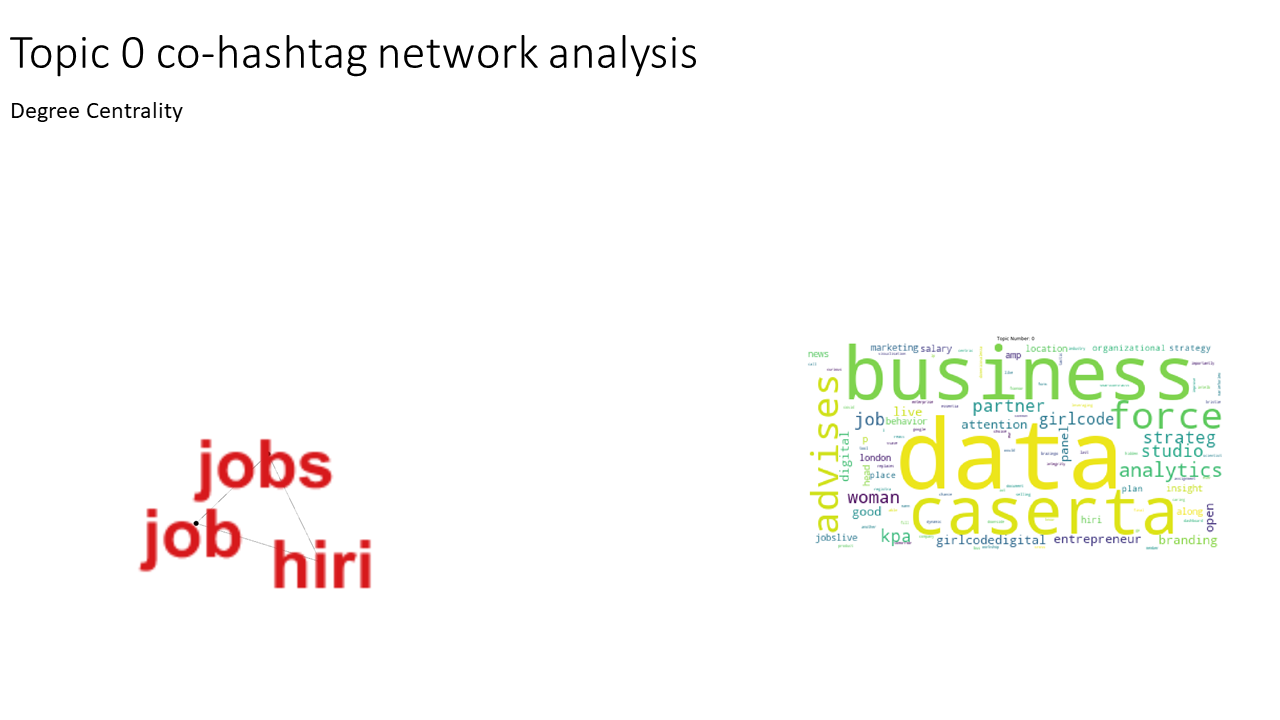

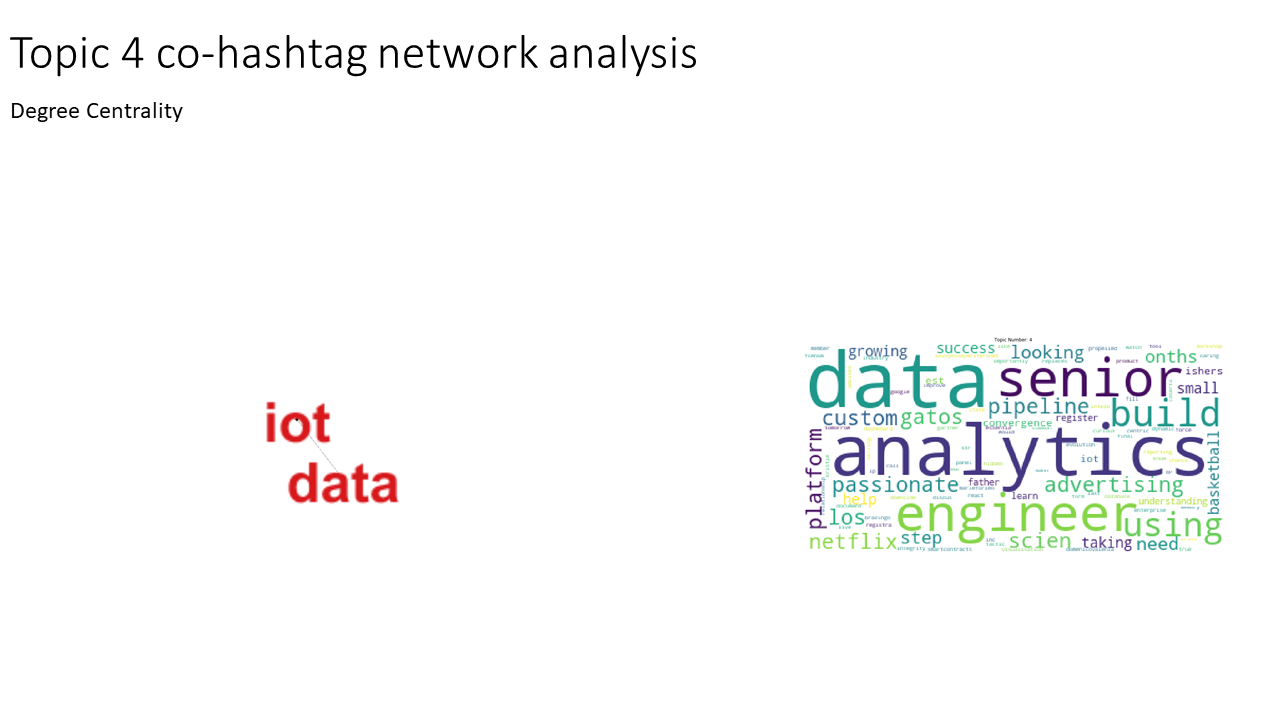

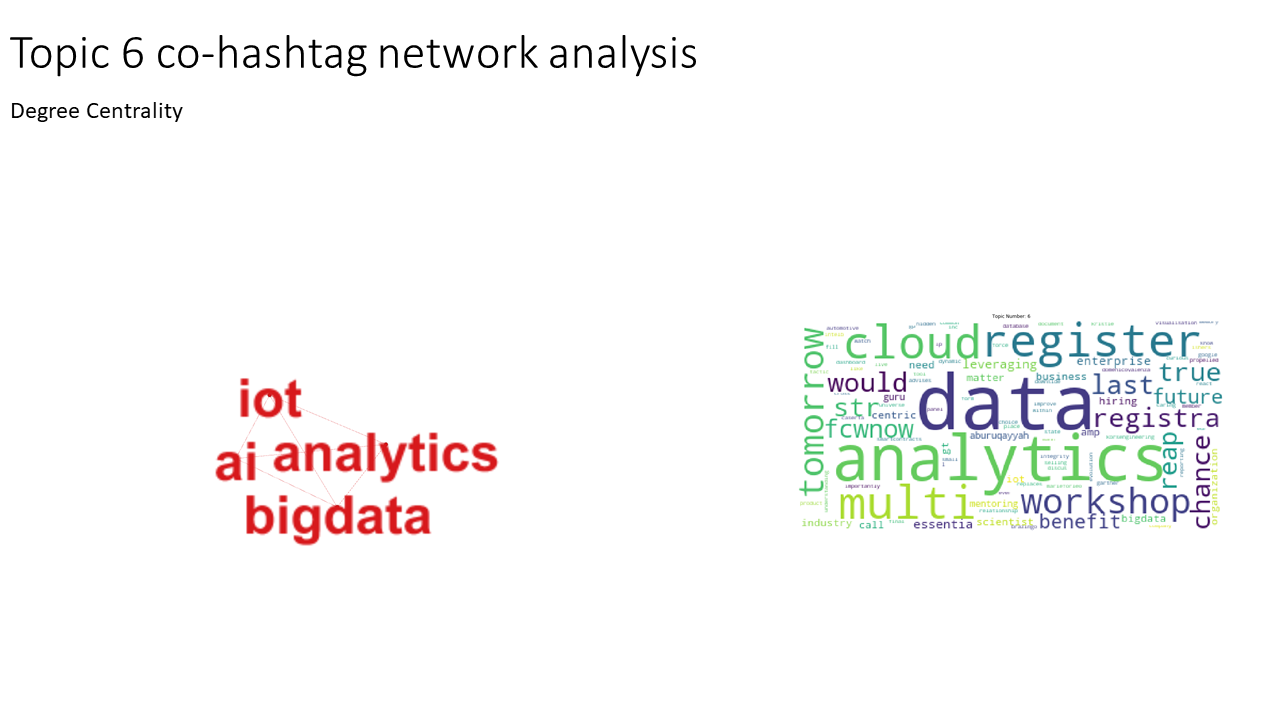

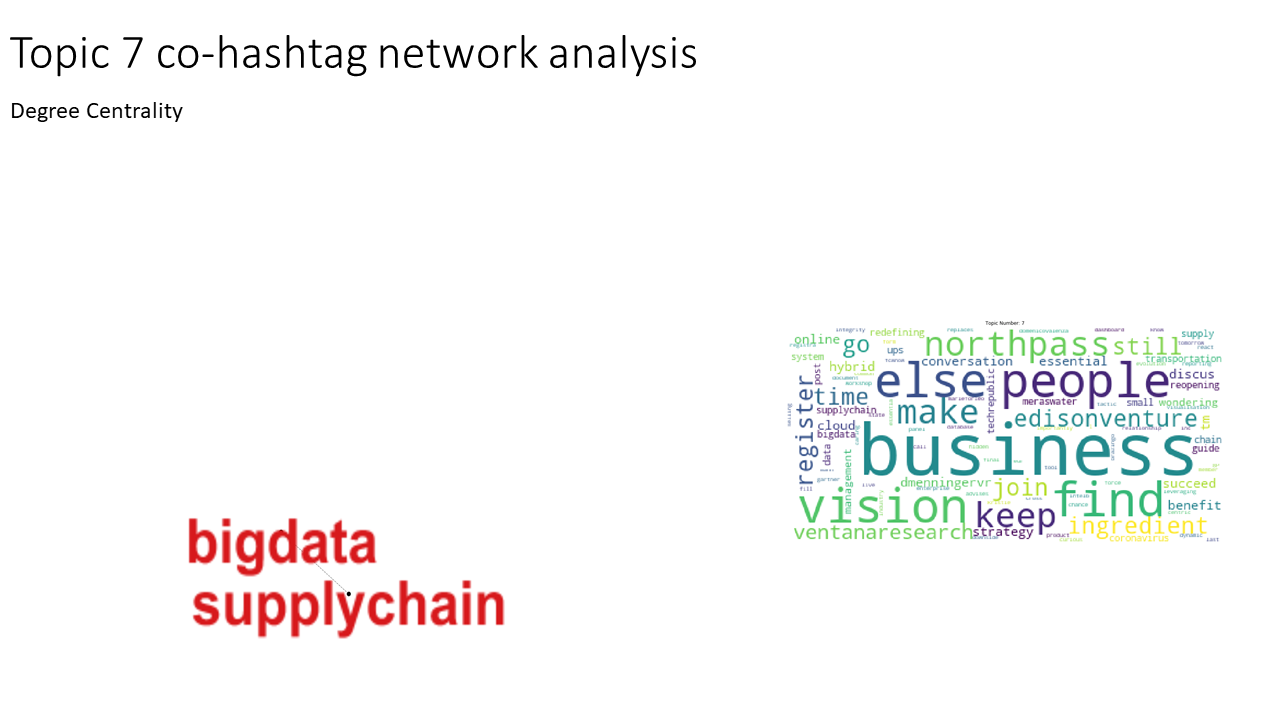

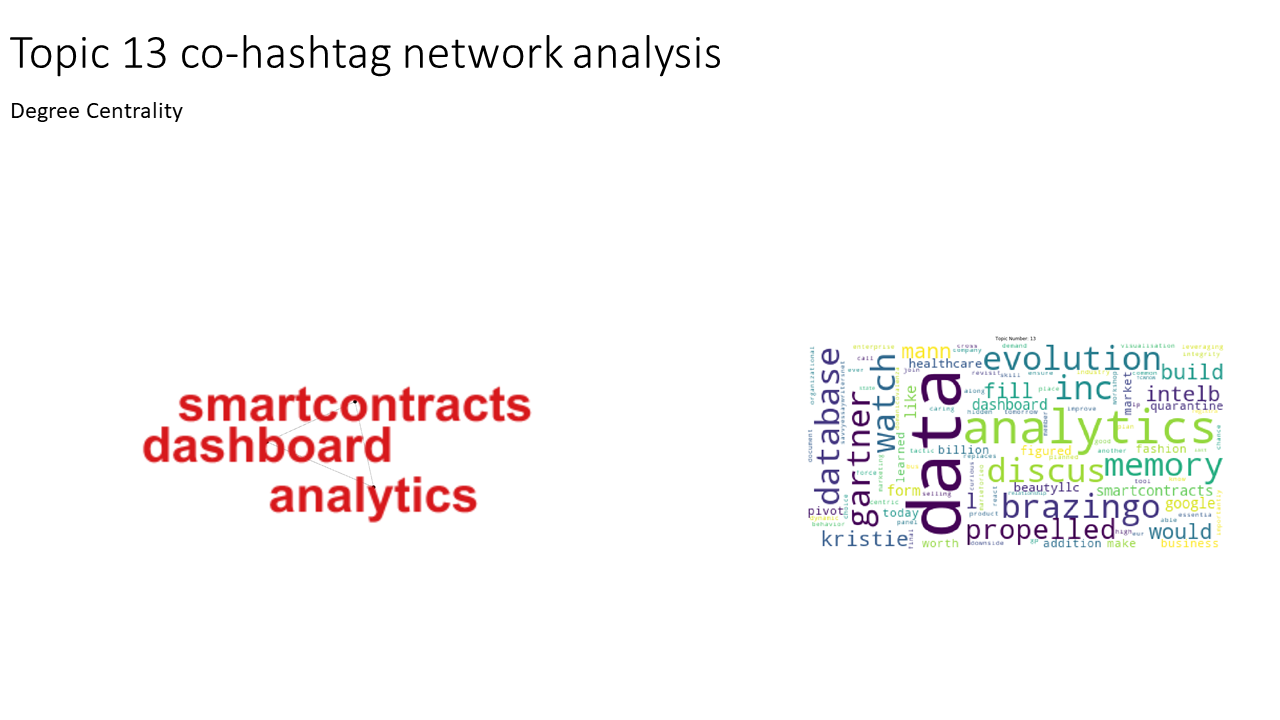

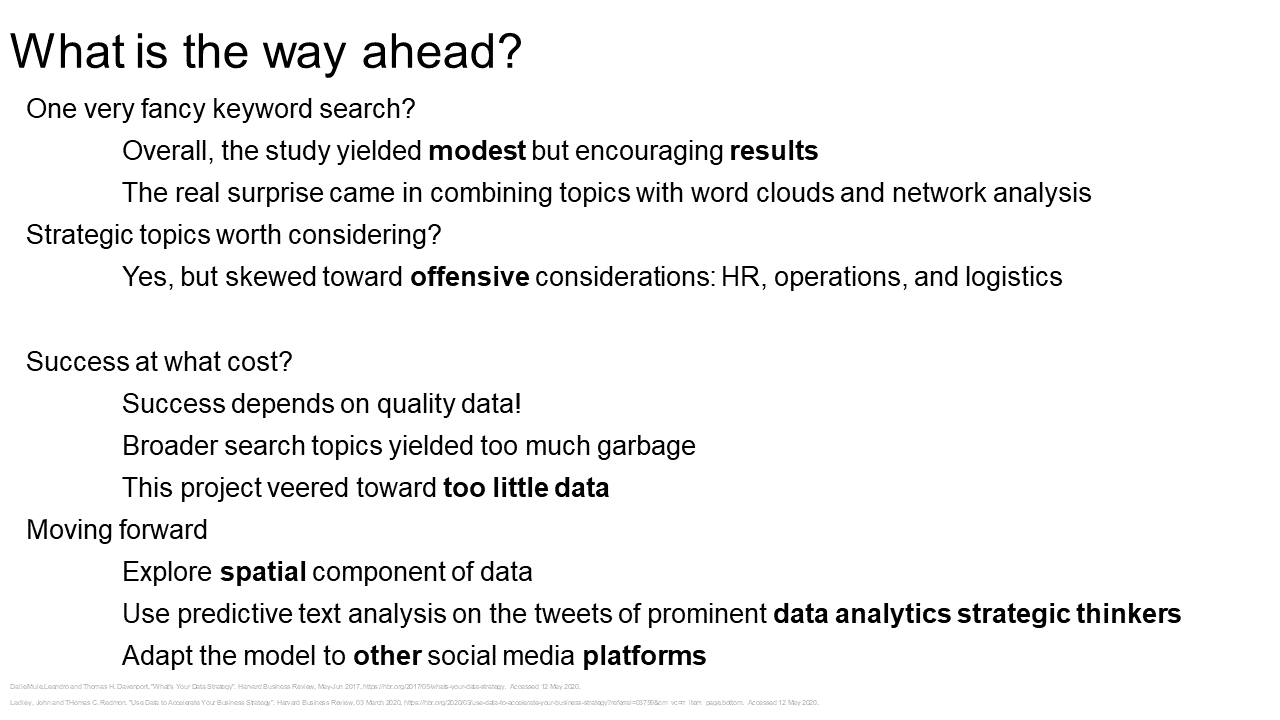

### Project References


Avila, Damian.  "RISE quick mini tutorial". youtube.com, 28 May 2017, https://www.youtube.com/watch?v=sXyFa_r1nxA&feature=youtu.be. Accessed 11 May 2020.  
DalleMule,Leandro and Thomas H. Davenport. "What's Your Data Strategy". Harvard Business Review, May-Jun 2017, https://hbr.org/2017/05/whats-your-data-strategy.  Accessed 12 May 2020. 

Ladley, John and THomas C. Redmon. "Use Data to Accelerate Your Business Strategy". Harvard Business Review, 03 March 2020, https://hbr.org/2020/03/use-data-to-accelerate-your-business-strategy?referral=03759&cm_vc=rr_item_page.bottom.  Accessed 12 May 2020.  

Matplotlib, "matplotlib.pyplot.savefig" matplotlib Version 3.2.1,  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html. Accessed 12 May 2020.  

RISE. "What is RISE?" RISE 5.6.1, rise.readthedocs.io,  https://rise.readthedocs.io/en/stable/. Accessed 11 May 2020 



Stackoverflow. "Matplotlib (pyplot) savefig outputs blank image", stackoverflow.com, https://stackoverflow.com/questions/9012487/matplotlib-pyplot-savefig-outputs-blank-image.  Accessed 12 May 2020.  

Stackoverflow. "Not able to Scrape geo coordinate with with tweet lat-Lon]" stackoverflow.com, https://stackoverflow.com/questions/46044445/not-able-to-scrape-geo-coordinate-with-tweets-lat-lon.  Accessed 12 May 2020.

### Instructor References

Moujahid, Adil. "An Introduction to Text Mining using Twitter Streaming API and Python." http://adilmoujahid.com, 21 July 2014, http://adilmoujahid.com/posts/2014/07/twitter-analytics/.  Accessed 12 May 2020.  
